# Задворный Даниэль Сергеевич 316

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
oldw <- getOption("warn")
options(warn = -1)


packages <- c('ggplot2', 'dplyr', 'tidyr', 'tibble')



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smsd
from outliers import smirnov_grubbs as grubbs
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
!ls

'Chess games stats.csv'  'Empty File'   README.md   stat.ipynb


In [5]:
df = pd.read_csv('Chess games stats.csv')

In [6]:
%%R

df <- read.csv("Chess games stats.csv")
df <- na.omit(df)


# Game ID:
Каждая игра на lichess.org имеет ID.
# White & Black Ratings:
Рейтинг игроков на lichess.org, чем выше рейтинг, тем лучше играет игрок. Все игры были рейтинговыми, поскольку игроки настроены более серьезны, когда есть риск потери рейтинга.
# Opening ECO:
Первые игры в шахматах, называются дебютной частью, которая обычно определяет настрой игры(позицию), примеры дебютов: Сицилианская защита, Ферзевой габит, защита Каро-Канн, Дебют Гроба. Поскольку названия могут быть достаточно длинными, то Encyclopaedia of Chess Openings (ECO), присвоило коды для каждого дебюта. Например, Ферзевой Гамбит - это D06
# Opening Ply:
В шахматах, ходы кторые были открыты и сыграны мастерами называются "теоретическими". Opening Ply - количество ходов, которые следуют шахматной теории мастеров пока они не превратятся в не так хорошо изученные ходы. Теоретический ход - это 1/2 от хода
# Average Centipawn Loss:
Сентипешка - это мера преймущества в фигурах в шахматах. 100 сентипешек равняются 1 пешке.
Игра в шахматы подрузамевает собой минимизацию потерь и максимизации твоего преймущества и наиболее сильные игроки знают как делать это лучше чем новички. Потеря в сентипешках считалась open-source шахматным движом Stockfish и в среднем оно равняется общему число потерь в сентипешках деленная на количество ходов конкретного игрока.
# Blunder:
Зевок - это ходы, которые считаются непростительной ошибкой, они координально меняют ход игры, если оппонент сыграет правильно.
# Mistake:
Ошибка - это ходы, которые считаются менее серьезными ошибками чем зевки, но все равно дает большее преимущество их оппоненту.
# Inaccuracies:
Неточности - это не ужастные ходы, но говорят, что ход является неточным, если существуют более хорошие ходы, которые могут укрепить позицию в игре.



In [7]:
df

,Unnamed: 0,Game ID,White Rating,Black Rating,Opening ECO,Opening Ply,White Centi-pawn Loss,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders
0,0,J7Xvjkte,1441,1559,C20,4,32,2,2,0,87,2,4,1
1,1,SSzpi7W1,1258,1567,C46,6,43,0,0,1,6,0,0,0
2,2,NHpcYm3r,1697,1712,C68,7,11,1,0,0,42,1,0,2
3,3,Nrzmgzmn,1978,1868,D31,5,21,3,0,0,53,6,0,1
4,4,xMuFsnC6,2073,1816,A01,2,35,3,2,0,50,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,18632,uOHTBAzi,884,1415,B00,2,56,5,1,2,94,4,4,3
18633,18633,Prg9C0BE,1187,845,B20,3,38,5,0,1,12,2,0,0
18634,18634,516BT5yk,1450,789,B21,3,64,9,4,4,36,7,2,2
18635,18635,GvumTWls,1959,1684,C15,7,14,1,0,0,34,6,1,1


In [6]:
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df

,Game ID,White Rating,Black Rating,Opening ECO,Opening Ply,White Centi-pawn Loss,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders
0,J7Xvjkte,1441,1559,C20,4,32,2,2,0,87,2,4,1
1,SSzpi7W1,1258,1567,C46,6,43,0,0,1,6,0,0,0
2,NHpcYm3r,1697,1712,C68,7,11,1,0,0,42,1,0,2
3,Nrzmgzmn,1978,1868,D31,5,21,3,0,0,53,6,0,1
4,xMuFsnC6,2073,1816,A01,2,35,3,2,0,50,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,uOHTBAzi,884,1415,B00,2,56,5,1,2,94,4,4,3
18633,Prg9C0BE,1187,845,B20,3,38,5,0,1,12,2,0,0
18634,516BT5yk,1450,789,B21,3,64,9,4,4,36,7,2,2
18635,GvumTWls,1959,1684,C15,7,14,1,0,0,34,6,1,1


In [10]:
df.isna().sum()

Game ID                           0
White Rating                      0
Black Rating                      0
Opening ECO                       0
Opening Ply                       0
White Centi-pawn Loss             0
White's Number of Inaccuracies    0
White's Number of Mistakes        0
White's Number of Blunders        0
Black Centi-pawn Loss             0
Black's Number of Inaccuracies    0
Black's Number of Mistakes        0
Black's Number of Blunders        0
dtype: int64

In [11]:
df.dtypes

Game ID                           object
White Rating                       int64
Black Rating                       int64
Opening ECO                       object
Opening Ply                        int64
White Centi-pawn Loss              int64
White's Number of Inaccuracies     int64
White's Number of Mistakes         int64
White's Number of Blunders         int64
Black Centi-pawn Loss              int64
Black's Number of Inaccuracies     int64
Black's Number of Mistakes         int64
Black's Number of Blunders         int64
dtype: object

# Подготовка данных
Давайте, разобьем средний рейтинг двух игроков на группы, чтобы было удобнее анализировать и выдвигать гипотезы

Для этого добавим колонку, обозначающую диапазон, в который попадает рейтинг конкретных игроков, например возьмем окно равное 500

In [7]:
df['Rating range'] = ((df['White Rating'] + df['Black Rating']) // 2).apply(lambda x: f'{500 *(x // 500)}-{500 * (x // 500 + 1)}')


In [13]:
df

,Game ID,White Rating,Black Rating,Opening ECO,Opening Ply,White Centi-pawn Loss,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders,Rating range
0,J7Xvjkte,1441,1559,C20,4,32,2,2,0,87,2,4,1,1500-2000
1,SSzpi7W1,1258,1567,C46,6,43,0,0,1,6,0,0,0,1000-1500
2,NHpcYm3r,1697,1712,C68,7,11,1,0,0,42,1,0,2,1500-2000
3,Nrzmgzmn,1978,1868,D31,5,21,3,0,0,53,6,0,1,1500-2000
4,xMuFsnC6,2073,1816,A01,2,35,3,2,0,50,6,3,0,1500-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,uOHTBAzi,884,1415,B00,2,56,5,1,2,94,4,4,3,1000-1500
18633,Prg9C0BE,1187,845,B20,3,38,5,0,1,12,2,0,0,1000-1500
18634,516BT5yk,1450,789,B21,3,64,9,4,4,36,7,2,2,1000-1500
18635,GvumTWls,1959,1684,C15,7,14,1,0,0,34,6,1,1,1500-2000


In [14]:
%%R
fun <- function(x) {
    paste(toString(500 *(x %/% 500)), toString(500 * (x %/% 500 + 1)), sep="-")
}
df$Rating.range <- apply((df['White.Rating'] + df['Black.Rating']) %/% 2, c(1, 2), fun)
head(df)

  X  Game.ID White.Rating Black.Rating Opening.ECO Opening.Ply
1 0 J7Xvjkte         1441         1559         C20           4
2 1 SSzpi7W1         1258         1567         C46           6
3 2 NHpcYm3r         1697         1712         C68           7
4 3 Nrzmgzmn         1978         1868         D31           5
5 4 xMuFsnC6         2073         1816         A01           2
6 5 gcdFqoqK         1944         2052         C44           9
  White.Centi.pawn.Loss White.s.Number.of.Inaccuracies
1                    32                              2
2                    43                              0
3                    11                              1
4                    21                              3
5                    35                              3
6                    79                              3
  White.s.Number.of.Mistakes White.s.Number.of.Blunders Black.Centi.pawn.Loss
1                          2                          0                    87
2                 

# Задание 1

Большие потери в ценах пешки, говорят о неаккуратной игре, серъезных ошибках, поэтому логично предположить, что с ростом рейтинга распределение все сильнее будет сосредотачиваться в районе нуля.

Для этого посмотрим на распределение этих потерь в зависимости от рейтинга

Воспользуемся методом **ядерной оценки плотности**(KDE)

Он уже реализован в пакете seaborn и по умолчанию стоит ядро стандартного нормального распределения

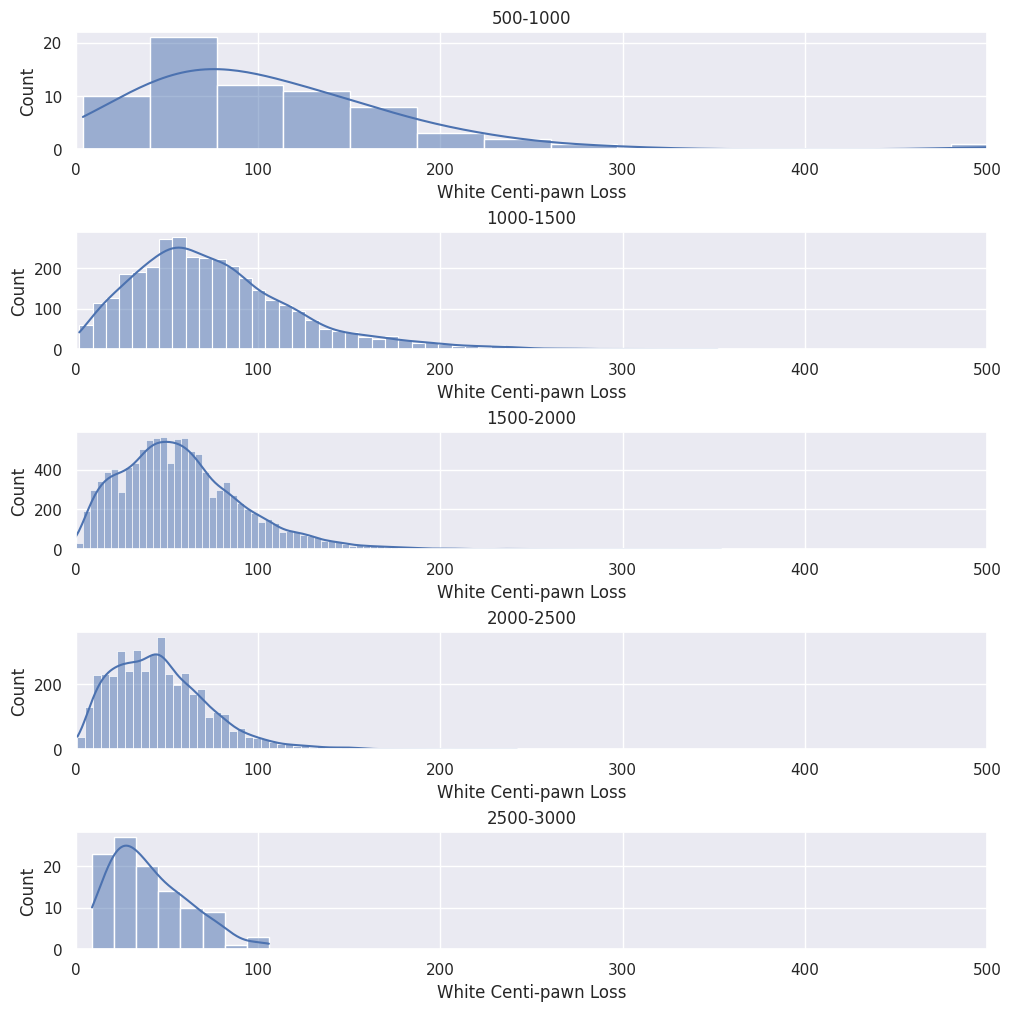

In [15]:
sns.set()
fig, axes = plt.subplots(df["Rating range"].unique().shape[0], 1, figsize=(10, 10), constrained_layout=True)
for ax in axes:
    ax.set_xlim(0, 500)
for i, RatingRange in enumerate(sorted(df["Rating range"].unique(), key=lambda x: int(x.split('-')[0]))):  
    sns.histplot(data=df.where(df["Rating range"] == RatingRange), 
                x="White Centi-pawn Loss", 
                kde=True,
                ax=axes[i]).set(title=RatingRange)
fig.show()

Можно видеть, что действительно с ростом рейтинга, распределение начинает сосредотачиваться в районе нуля

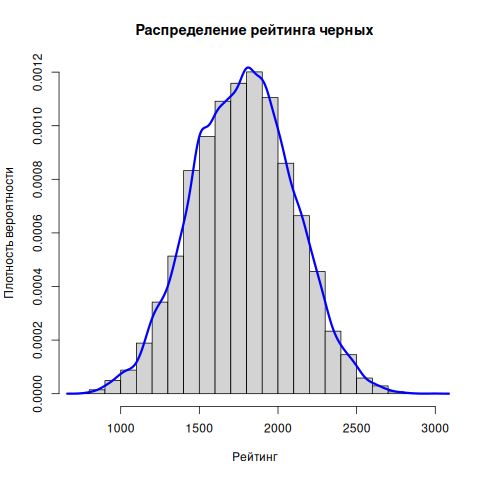

In [16]:
%%R
hist(df$Black.Rating, breaks = 20, freq = FALSE,
     xlab = "Рейтинг",
     ylab = "Плотность вероятности",
     main = "Распределение рейтинга черных")
lines(density(df$Black.Rating), col = "blue", lwd = 3)


# Задание 2

### cdplot
Для визуализации связи между двумя переменными, одна из которых является количественной, а другая качественной (фактором), можно использовать диаграмму размахов.  При таком подходе ось ординат соответствовала бы значениям количественной переменной. Полезной здесь может оказаться одна из базовых графических функций R - *cdplot()*, позволяющая совмещать на одном графике плотности вероятности для каждого уровня интересующей исследователя качественной переменной (англ. conditional density plot).

Её аналог можно найти в библиотеке seaborn языка Python - *displot* с параметрами **multiple='fill' и kind='kde'**

In [17]:
order = ['500-1000', '1000-1500', '1500-2000', '2000-2500']

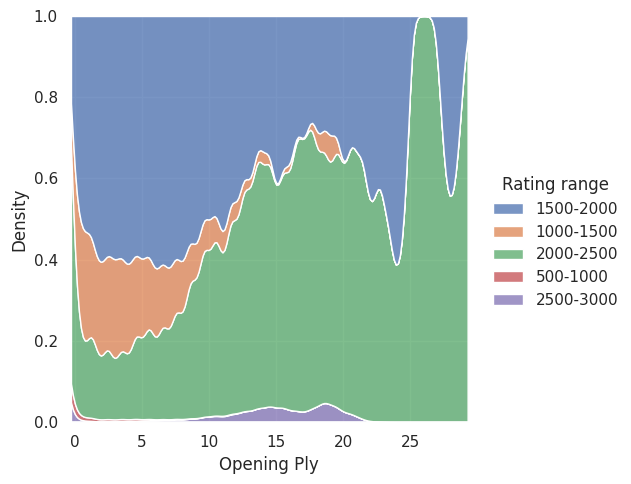

In [18]:
sns.displot(data=df, x = 'Opening Ply', hue='Rating range', multiple='fill', kind='kde')

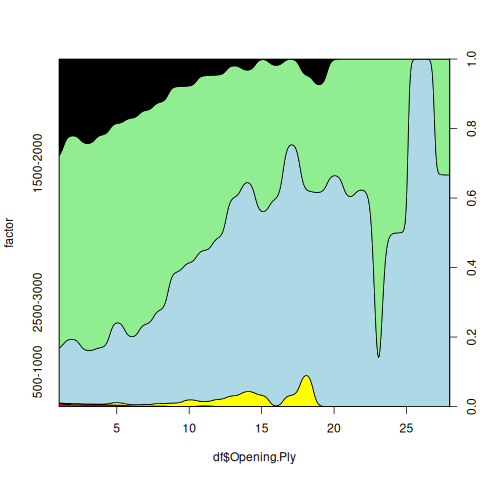

In [19]:
%%R
df$factor <- factor(df$Rating.range)
cdplot(factor ~ df$Opening.Ply, col = c("red", "yellow", "lightblue", "lightgreen", "black"), data=df, las=1)

Эта функция не учитывает дисбаланс между классами *Rating range*, потому что она считает, что плотности в каждой точке должны суммироваться в единицу.

Из графика можем видеть, что игроки с низким рейтингом 500-1000, почти не делают теоритических ходов, что в целом логично, поскольку чаще всего они являются новичками. Далее пик плотностей с ростом рейтинга начинает двигаться вправо. Интересным является, что игроки с рейтингом 1500-2000 имеются два "пика", причем они находятся достаточно далеко друг от друга, возможно это связано с тем, что примерно половина игроков старается увеличить свой рейтинг и поэтому очень сильно погружаются в теорию, также возможно что это связано с тем, что "шаг" между классами является достаточно большим - 500 рейтинга и нужно еще сильнее "подробить" класс 1500-2000; третий возможный вариант - известно, что разные дебюты имеют разное количество "теоритических ходов", поэтому и имеется такой дисбаланс.

### dotchart

*dotchart()* - функция языка R предназначенная для визуализации зависимостей между категориальными и количественными признаками. По одной оси она откладывает значения категориальной переменной, по другой значение числовое, соответсвующее, своей категориальной переменной.

In [20]:
df['Opening ECO'].unique()

array(['C20', 'C46', 'C68', 'D31', 'A01', 'C44', 'C50', 'D80', 'B06',
       'D32', 'C00', 'A46', 'D40', 'C02', 'A53', 'C10', 'A41', 'B22',
       'B18', 'B40', 'B01', 'C23', 'A02', 'B12', 'D00', 'A45', 'D12',
       'C07', 'A10', 'A20', 'A14', 'C42', 'E90', 'D37', 'D85', 'B45',
       'B00', 'A04', 'C26', 'B50', 'B10', 'B07', 'C41', 'C01', 'B90',
       'A40', 'A44', 'A80', 'C47', 'C77', 'D45', 'C19', 'C62', 'C70',
       'D04', 'C45', 'C40', 'B95', 'A22', 'B03', 'D94', 'C25', 'B30',
       'A00', 'C57', 'B24', 'B53', 'C24', 'B84', 'B52', 'B02', 'B20',
       'C48', 'C78', 'A16', 'B31', 'A15', 'B27', 'C66', 'D02', 'D20',
       'C55', 'C22', 'A47', 'D01', 'B17', 'B32', 'B21', 'A11', 'A43',
       'A50', 'E21', 'B56', 'A13', 'B23', 'C49', 'A30', 'B11', 'C34',
       'A48', 'A67', 'C58', 'A03', 'A37', 'C21', 'B25', 'C64', 'D10',
       'B34', 'D93', 'D30', 'C65', 'E80', 'C60', 'B92', 'B33', 'B51',
       'D47', 'B76', 'E12', 'E73', 'A31', 'A60', 'A08', 'D07', 'D06',
       'C11', 'A21',

Как видим всего в датасете достаточно много дебютов - они не поместятся все на одном графике одновременно, поэтому давайте посмотрим на 15 самых популярных.

In [21]:
PopularECOs = df.groupby(by='Opening ECO').count().sort_values(by='Game ID', ascending=False).index[:15].tolist()

In [22]:
PopularECOs

['D00',
 'A00',
 'C00',
 'B01',
 'B00',
 'C50',
 'A40',
 'C41',
 'B20',
 'A45',
 'D02',
 'B10',
 'C42',
 'C20',
 'C02']

In [23]:
numeric = df.select_dtypes(include=np.number).columns.to_list()

tmp = df[numeric + ['Opening ECO']].groupby(by='Opening ECO').mean()#apply(lambda x: 0.5*(x['White Rating'] + x['Black Rating']))
#tmp.droplevel(1, axis=0) 
#tmp.columns = ['Opening ECO', 'Mean Rating']
tmp = (tmp['White Rating'] + tmp['Black Rating']) / 2
tmp

Opening ECO
A00    1664.727838
A01    1801.440625
A02    1764.578431
A03    1868.647059
A04    1801.079897
          ...     
E94    1885.428571
E95    1962.250000
E97    2170.833333
E98    2198.250000
E99    2449.000000
Length: 417, dtype: float64

<Axes: ylabel='Opening ECO'>

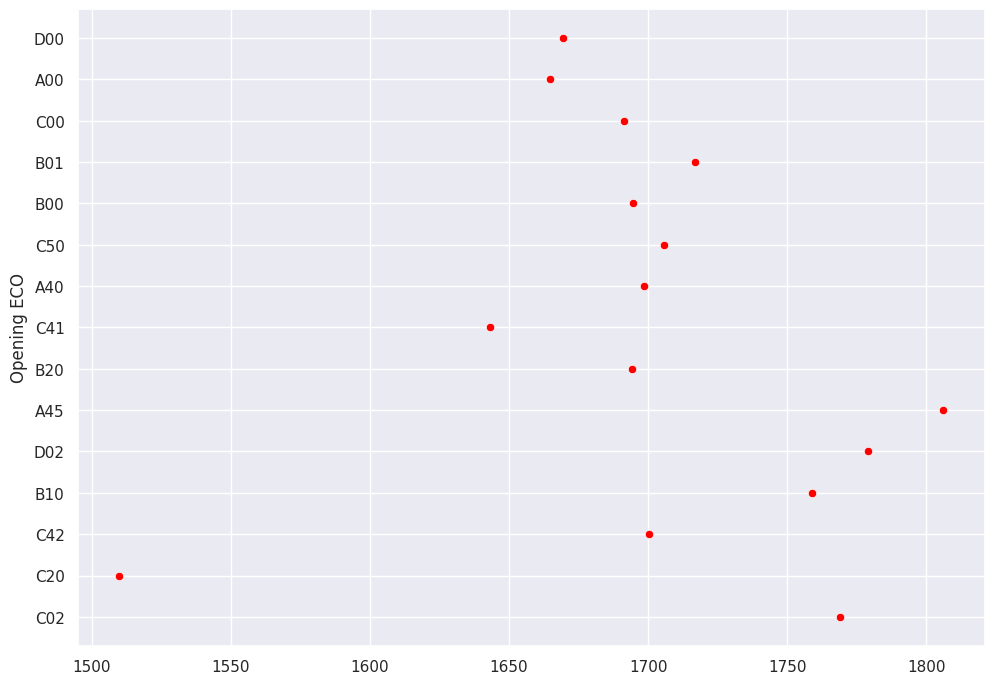

In [24]:
tmp = tmp.loc[PopularECOs]
sns.scatterplot(data=tmp, x=tmp, y=tmp.index, color='red')

Здесь мы выбрали 15 самых популярных шахматных дебютов и посмотрели на средний рейтинг игроков для них.

Как видим дебют C20 имеет существенно меньший рейтинг, а A45 несколько больший других, давайте узнаем, что это за дебюты.

C20 - [Дебют королевских пешек](https://www.365chess.com/eco/C20_King's_pawn_game)
A45 - [Индийская защита](https://www.365chess.com/eco/A45_Queen's_pawn_game)

В целом, это достаточно логично, потому что если верить статистике матчей C20, даёт достаточно весомое преимущество белым, а A45 имеет достаточно равномерное распределение для победы белых, черных и ничьи. Также Индийская защита имеет менее очевидное расположение фигур для новичка, что сильно уменьшает вероятность появления этого дебюта случайным образом.

Интересным является является то, что самым популярным дебютом является D00 - [Дебют ферзевых пешек](https://www.365chess.com/eco/D00), возможно на это повлиял известный сериал "The queen's gambit" (рус. Ход Королевы), который привел много новых игроков.

<Axes: xlabel='White Centi-pawn Loss', ylabel='Rating range'>

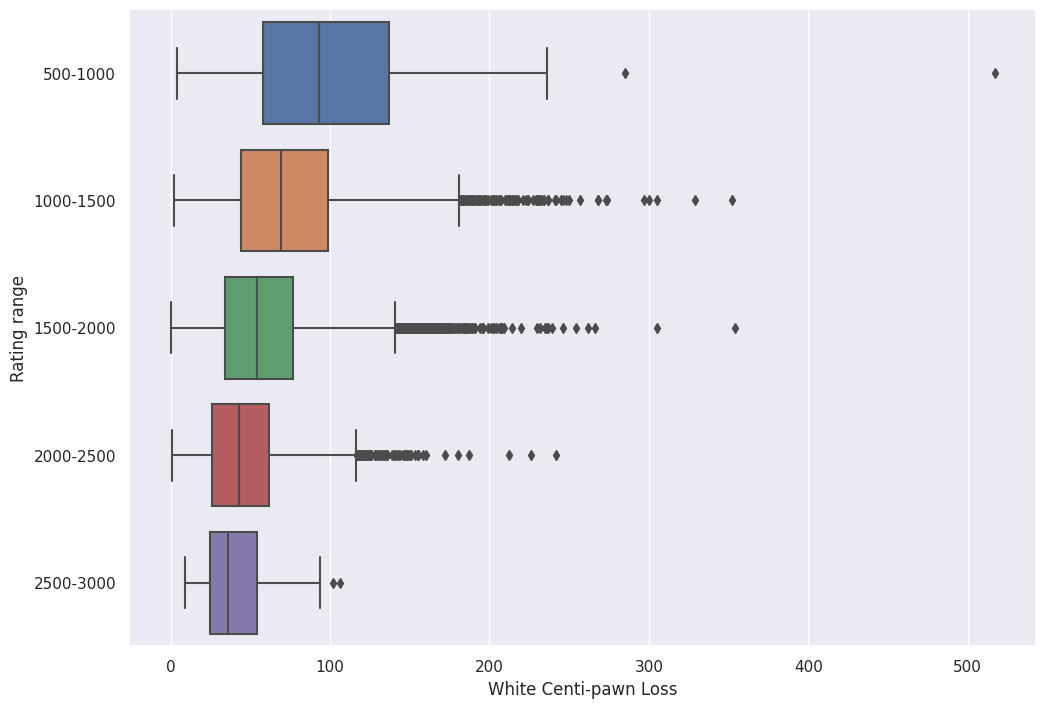

In [25]:
sns.boxplot(data=df, x='White Centi-pawn Loss', y='Rating range', order=['500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000'])

Опять же видим подтверждение, что с ростом рейтига, потери в пешках падают

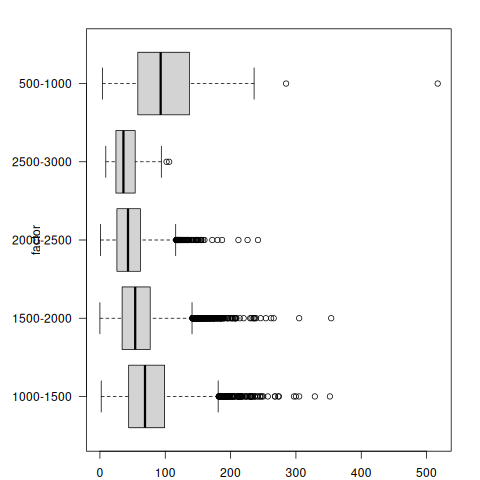

In [26]:
%%R
#dev.new(width=10, height=10)
par(mar = c(2, 6, 2, 2))

boxplot(df$White.Centi.pawn.Loss ~ factor, data=df, horizontal=TRUE, las=1)

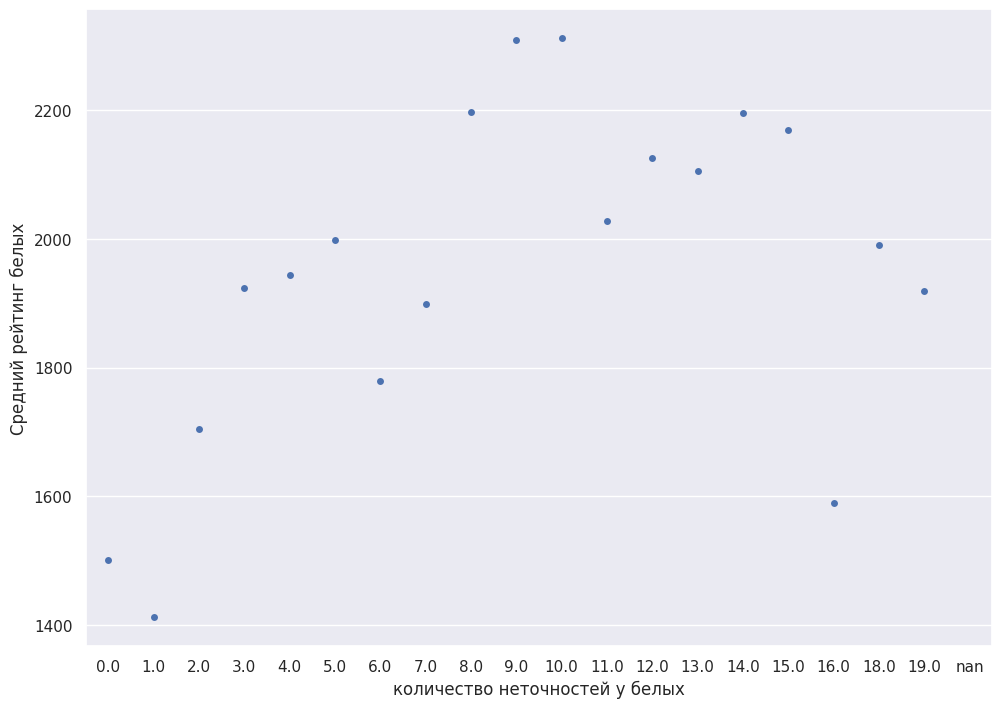

In [27]:
tmp = df[numeric].groupby("White's Number of Inaccuracies").mean()
#tmp = (tmp['White Rating'] + tmp['Black Rating']) / 2
tmp['mean'] = (df['White Rating'] + df['Black Rating']) // 2
fig = sns.stripplot(data=tmp, x="White's Number of Inaccuracies", y=(df['White Rating'] + df['Black Rating']) // 2).set(xlabel="количество неточностей у белых",
                                                                                                                       ylabel="Средний рейтинг белых")


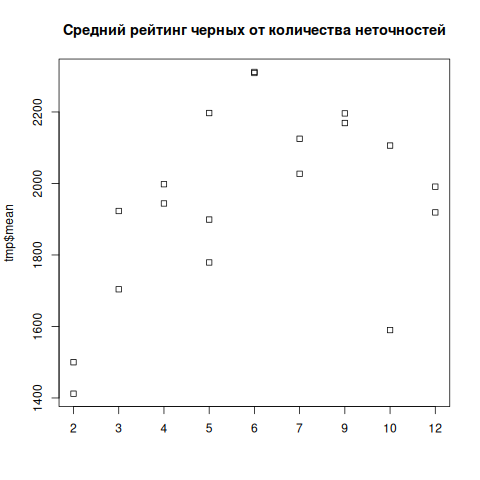

In [28]:
%%R -i tmp
stripchart(tmp$mean ~ round(tmp$"Black's Number of Inaccuracies"), vertical=TRUE, breaks = 12, main="Средний рейтинг черных от количества неточностей")

# Задание 3

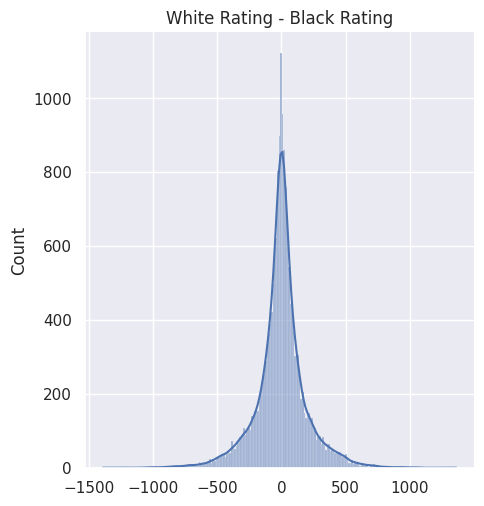

In [29]:
sns.displot(data=df, x=df['White Rating'] - df['Black Rating'], kde=True).set(title='White Rating - Black Rating')

### Тест Граббса

Тест граббса работает с нормально распредленными данными, наше распредление похоже на нормальное

In [30]:
outliersInd = grubbs.max_test_indices(df['White Rating']-df['Black Rating'], alpha=0.05)

In [31]:
df.iloc[outliersInd]

,Game ID,White Rating,Black Rating,Opening ECO,Opening Ply,White Centi-pawn Loss,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders,Rating range
5480,yVT422RG,2511,1149,B30,4,17,1,0,0,72,1,1,1,1500-2000
5080,T8moUsx1,2526,1216,C45,8,18,4,0,0,38,7,0,2,1500-2000
3426,28P9ok3n,2417,1117,C34,6,90,4,3,2,142,3,6,2,1500-2000
9378,XHpeVfiK,1395,2654,C00,3,59,3,0,2,18,1,0,0,2000-2500


In [32]:
%%R
#install.packages("outliers")
library(outliers)
grubbs.test(df$White.Rating - df$Black.Rating)


	Grubbs test for one outlier

data:  df$White.Rating - df$Black.Rating
G = 6.88636, U = 0.99746, p-value = 5.175e-08
alternative hypothesis: lowest value -1391 is an outlier



### Тест Диксона

Как известно, тест Диксона работает только с выборками, у которых размер от 3 до 30, поэтому давайте искуственно включим выброс, полученный тестом Граббса

In [33]:
%%R
sampled <- (df$White.Rating - df$Black.Rating)[sample(15000, size=29)]
sampled <- append(sampled, -1391)
sampled

 [1]  -331    56    -1   267    38  -206   115   118     4   -95   123     2
[13]    91    13   340    19    66  -193  -133    95   167     3   -65    29
[25]  -111    65   118   -35   218 -1391


In [34]:
%%R
dixon.test(sampled, opposite = FALSE, two.sided = TRUE)


	Dixon test for outliers

data:  sampled
Q = 0.73648, p-value < 2.2e-16
alternative hypothesis: lowest value -1391 is an outlier



Как мы видим, тест Диксона также распознал значение -1391 как выброс.

Здесь мы нашли игры, рейтинг игроков в которых очень сильно отличается, это значит, что исход игры был заранее предопределен, а значит при подсчете статистик их можно выкинуть, поскольку они являются выбросами


# Задание 4

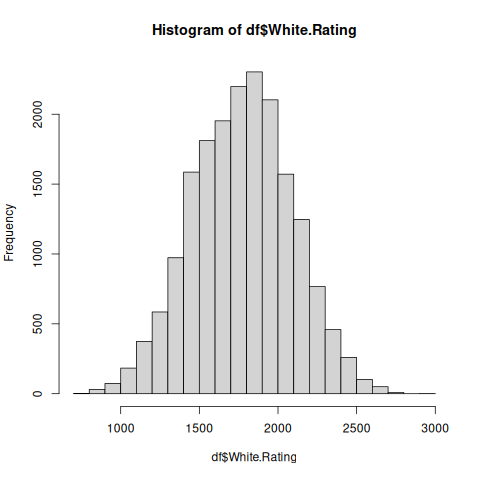

In [35]:
%%R
hist(df$White.Rating)

Будем проверять разные способы заполнения пропусков в данных, для этого давайте запомним истинные значения данных, и будем проверять по метрике <br>
MSE $= \frac{1}{n} \sum_{i} (y_{i} - \hat{y_{i}})^{2}$ <br>
Здесь $y_{i}$ - истинное значение, $\hat{y_{i}}$ - предсказанное <br>
Давайте выберем случайные 50 наблюдений и посмотрим на метрики

Давайте попробуем заполнить пропуски для значения рейтинга беллых


In [36]:
indx = np.random.randint(0, 18636, size=50)
true = df.loc[indx]['White Rating']
true.head(10)

7200     1315
10415    1305
2343     2123
6449     1899
5224     1625
4262     1161
14981     893
11013    2071
15117    1777
10109    1764
Name: White Rating, dtype: int64

### Заполнение средним значением

In [37]:
mean_pred = [df['White Rating'].mean()]*50
mean_pred[0]

1774.5285185383914

### Заполнение медианой

In [38]:
median_pred = [df['White Rating'].median()]*50
median_pred[0]

1782.0

### Заполнение модой

In [39]:
mode_pred = [np.array(df['White Rating'].mode())[0]] * 50
mode_pred[0]

1500

### Заполнение с учетом специфики данных

Мы уже строили распредление разности рейтинга черных и белых, оно очень сильно сосредоточено в окрестности нуля, поэтому можем попробовать заполнить рейтингом черных

In [40]:
spec_pred = df.loc[indx]['Black Rating']
spec_pred.head()

7200     1596
10415    1277
2343     1853
6449     1898
5224     1567
Name: Black Rating, dtype: int64

In [41]:
from sklearn.metrics import mean_squared_error
print(f'MSE для заполнения средним {mean_squared_error(true, mean_pred)}')
print(f'MSE для заполнения медианной {mean_squared_error(true, median_pred)}')
print(f'MSE для заполнения модой {mean_squared_error(true, mode_pred)}')
print(f'MSE для заполнением рейтингом черных {mean_squared_error(true, spec_pred)}')

MSE для заполнения средним 153571.3238669101
MSE для заполнения медианной 154285.96
MSE для заполнения модой 204730.12
MSE для заполнением рейтингом черных 50951.58


Заполнение рейтингом черных ожидаемо дает наилучший результат, поскольку только оно одно использует специфику данных. Видим, что получаем немного лучше значения для заполнения медианой чем средним, но разница не существенная, это связано с тем, что распредление данных сильно похоже на нормальное, а для него медиана совпадает со средним. Заполнение модой дает очень большую ошибку. <br>

Давайте посмотрим на другие данные


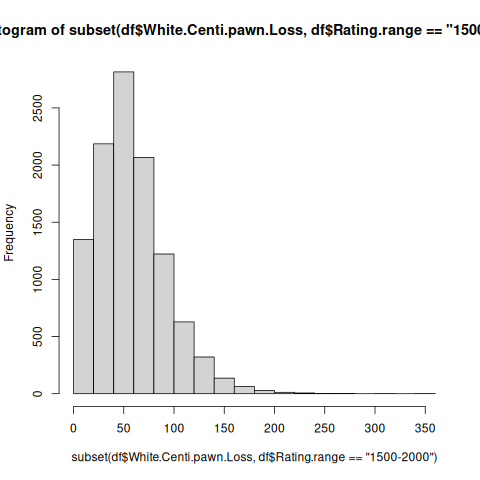

In [42]:
%%R
hist(subset(df$White.Centi.pawn.Loss, df$Rating.range == '1500-2000'))

In [43]:
%%R
data <- subset(df$White.Centi.pawn.Loss, df$Rating.range == '1500-2000')
true <- data[sample(length(data), size=50)]
true

 [1]  91  43  59  58  17 103  23  74  16  89  68  72   5  34  29 115  42  81   2
[20]  36  61  55  68  21  20  65  54  11  98  76  81  83  62  38  94  39  12  26
[39]  35  45  12  23  53 119  37  29  79  22  59  45


In [44]:
%%R
#install.packages("glue")
library("glue")
mean_pred = mean(data)
median_pred = median(data)
print(glue("MSE для заполенения средним {mean((mean_pred - true)^2)}"))
print(glue("MSE для заполенения медианой {mean((median_pred - true)^2)}"))


MSE для заполенения средним 920.085593202868
MSE для заполенения медианой 882.1


Здесь заполнение средним дает лучший вариант

# Задание 5

In [45]:
norm = [[0]*2 for i in range(3)]
features = [[0]*2 for i in range(3)]

norm[0][0] = stats.norm.rvs(size=50, loc=0, scale=1)
norm[0][1] = stats.norm.rvs(size=500, loc=0, scale=1)

norm[1][0] = stats.norm.rvs(size=50, loc=12, scale=0.5)
norm[1][1] = stats.norm.rvs(size=500, loc=12, scale=0.5)

norm[2][0] = stats.norm.rvs(size=100, loc=4, scale=5)
norm[2][1] = stats.norm.rvs(size=1000, loc=4, scale=5)

features[0][0] = [50, 0, 1]
features[0][1] = [500, 0, 1]

features[1][0] = [50, 12, 0.5]
features[1][1] = [500, 12, 0.5]

features[2][0] = [100, 4, 5]
features[2][1] = [1000, 4, 5]

In [46]:
%%R

data1 <- rnorm(50, 2, 2)
data2 <- rnorm(50, 0, 1)

data3 <- rnorm(5000, 1, 4)
data4 <- rnorm(5000, 2, 3)

data5 <- rnorm(1000, 16, 0.5)
data6 <- rnorm(1000, 1, 1)


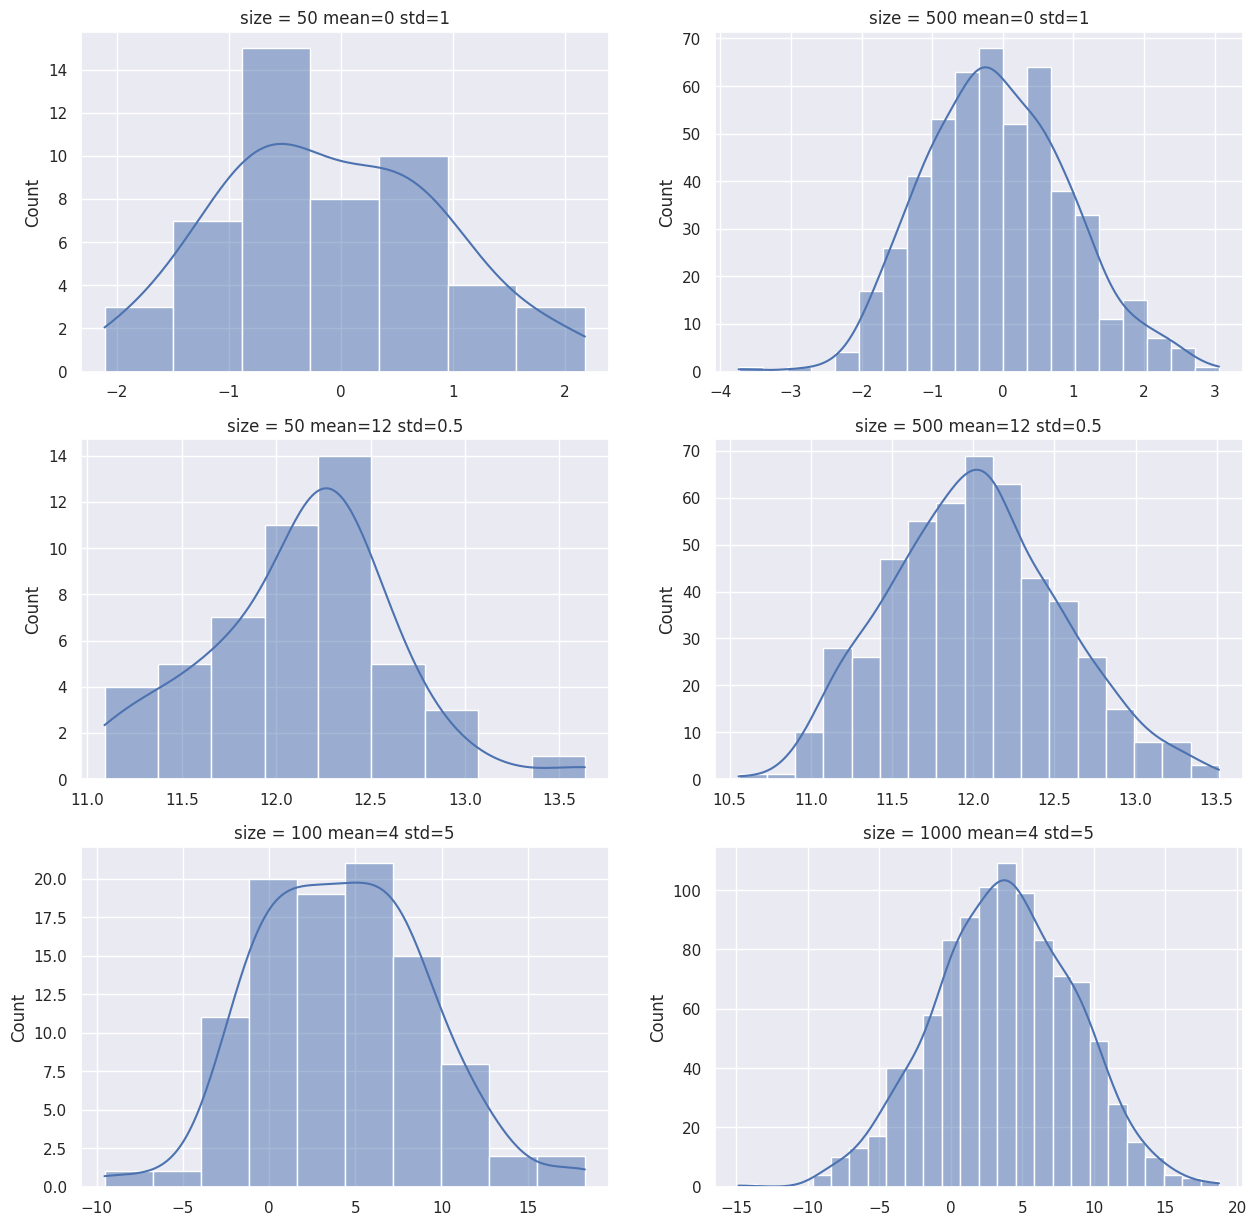

In [47]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))

for i in range(3):
    for j in range(2):
        axs[i][j].set_title(f'size = {features[i][j][0]} mean={features[i][j][1]} std={features[i][j][2]}')
        sns.histplot(data=norm[i][j], ax=axs[i][j], kde=True)

### Эмипирические функции распределения

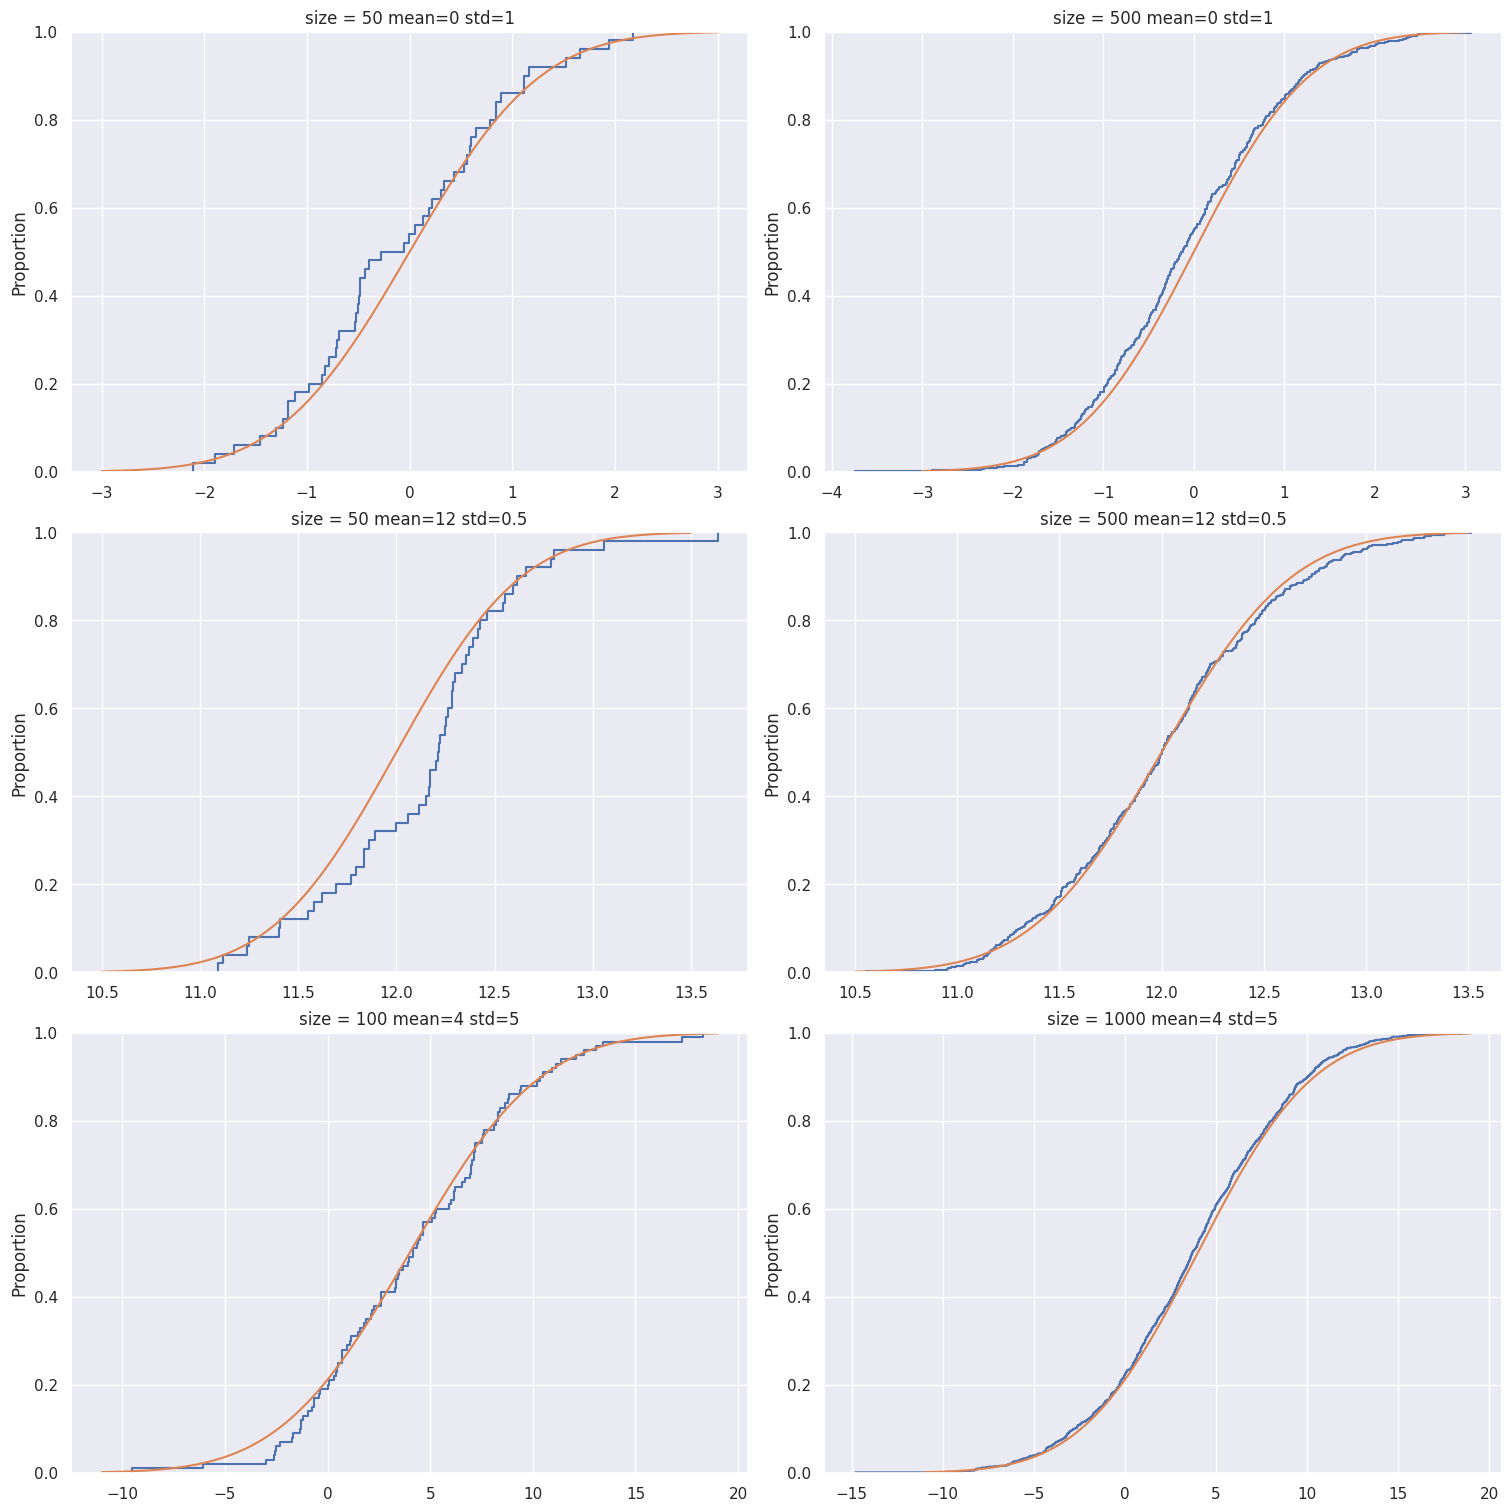

In [48]:
fig, axs = plt.subplots(3, 2, figsize=(15,15),  constrained_layout=True)

for i in range(3):
    for j in range(2):
        
        axs[i][j].set_title(f'size = {features[i][j][0]} mean={features[i][j][1]} std={features[i][j][2]}')
        sns.ecdfplot(data=norm[i][j], ax=axs[i][j])
        X = np.linspace(features[i][j][1]-3*features[i][j][2], features[i][j][1]+3*features[i][j][2], 10000)
        sns.lineplot(x=X, y=stats.norm.cdf(X, loc=features[i][j][1], 
                                           scale=features[i][j][2]), 
                                           ax=axs[i][j],
                                           palette='red')

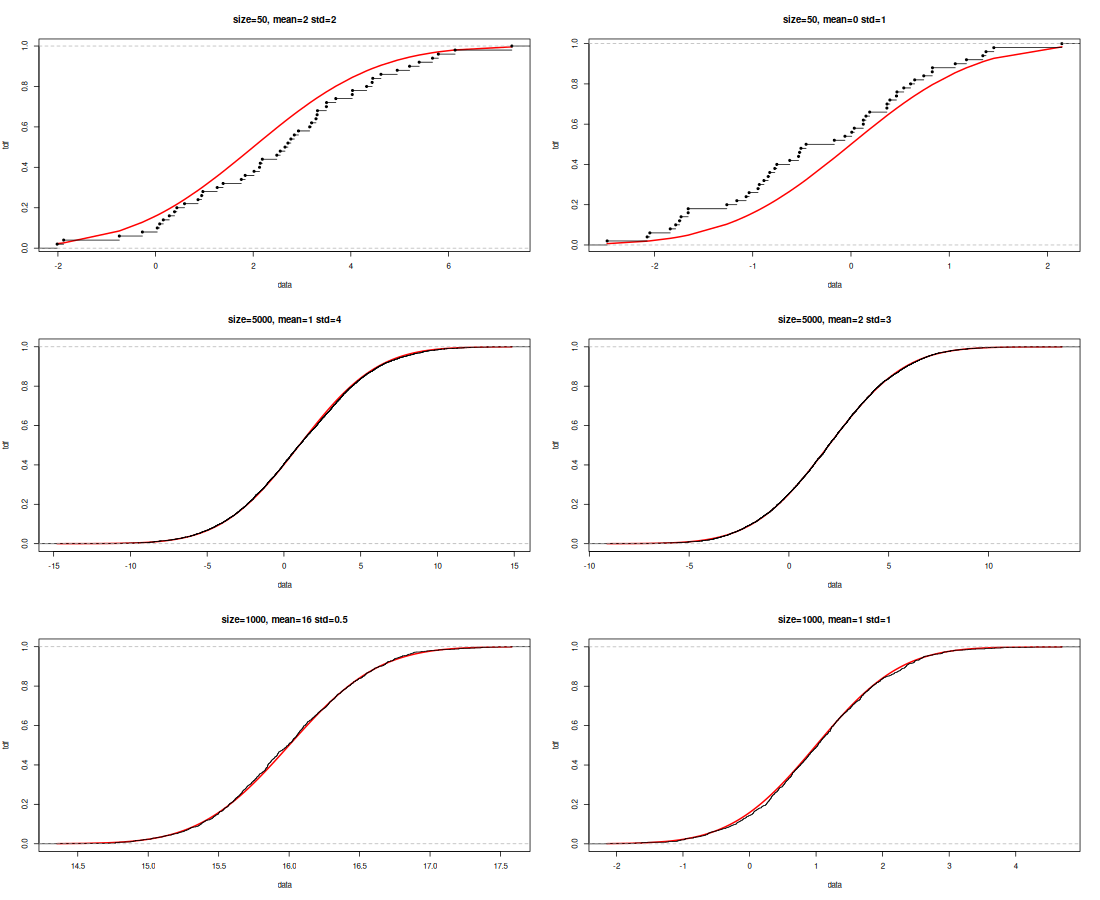

In [49]:
%%R -w 1100 -h 900
par(mfrow=c(3,2))
#library(ggplot2)
#ggplot(df, aes(x)) + stat_ecdf(geom = "step")
#plot(pnorm(data1, mean = 0, sd = 1), add=TRUE)

plot_distr <- function(data, tdf, title) {
    plot(data, tdf, type="l", lwd=2, col="red", main=title)
    plot(ecdf(data), add=TRUE)
}
data1 <- sort(data1)
data2 <- sort(data2)
data3 <- sort(data3)
data4 <- sort(data4)
data5 <- sort(data5)
data6 <- sort(data6)
plot_distr(data1, pnorm(data1, mean=2, sd=2), "size=50, mean=2 std=2")
plot_distr(data2, pnorm(data2, mean=0, sd=1), "size=50, mean=0 std=1")
plot_distr(data3, pnorm(data3, mean=1, sd=4), "size=5000, mean=1 std=4")
plot_distr(data4, pnorm(data4, mean=2, sd=3), "size=5000, mean=2 std=3")
plot_distr(data5, pnorm(data5, mean=16, sd=0.5), "size=1000, mean=16 std=0.5")
plot_distr(data6, pnorm(data6, mean=1, sd=1), "size=1000, mean=1 std=1")

### Квантиль-квантиль графики

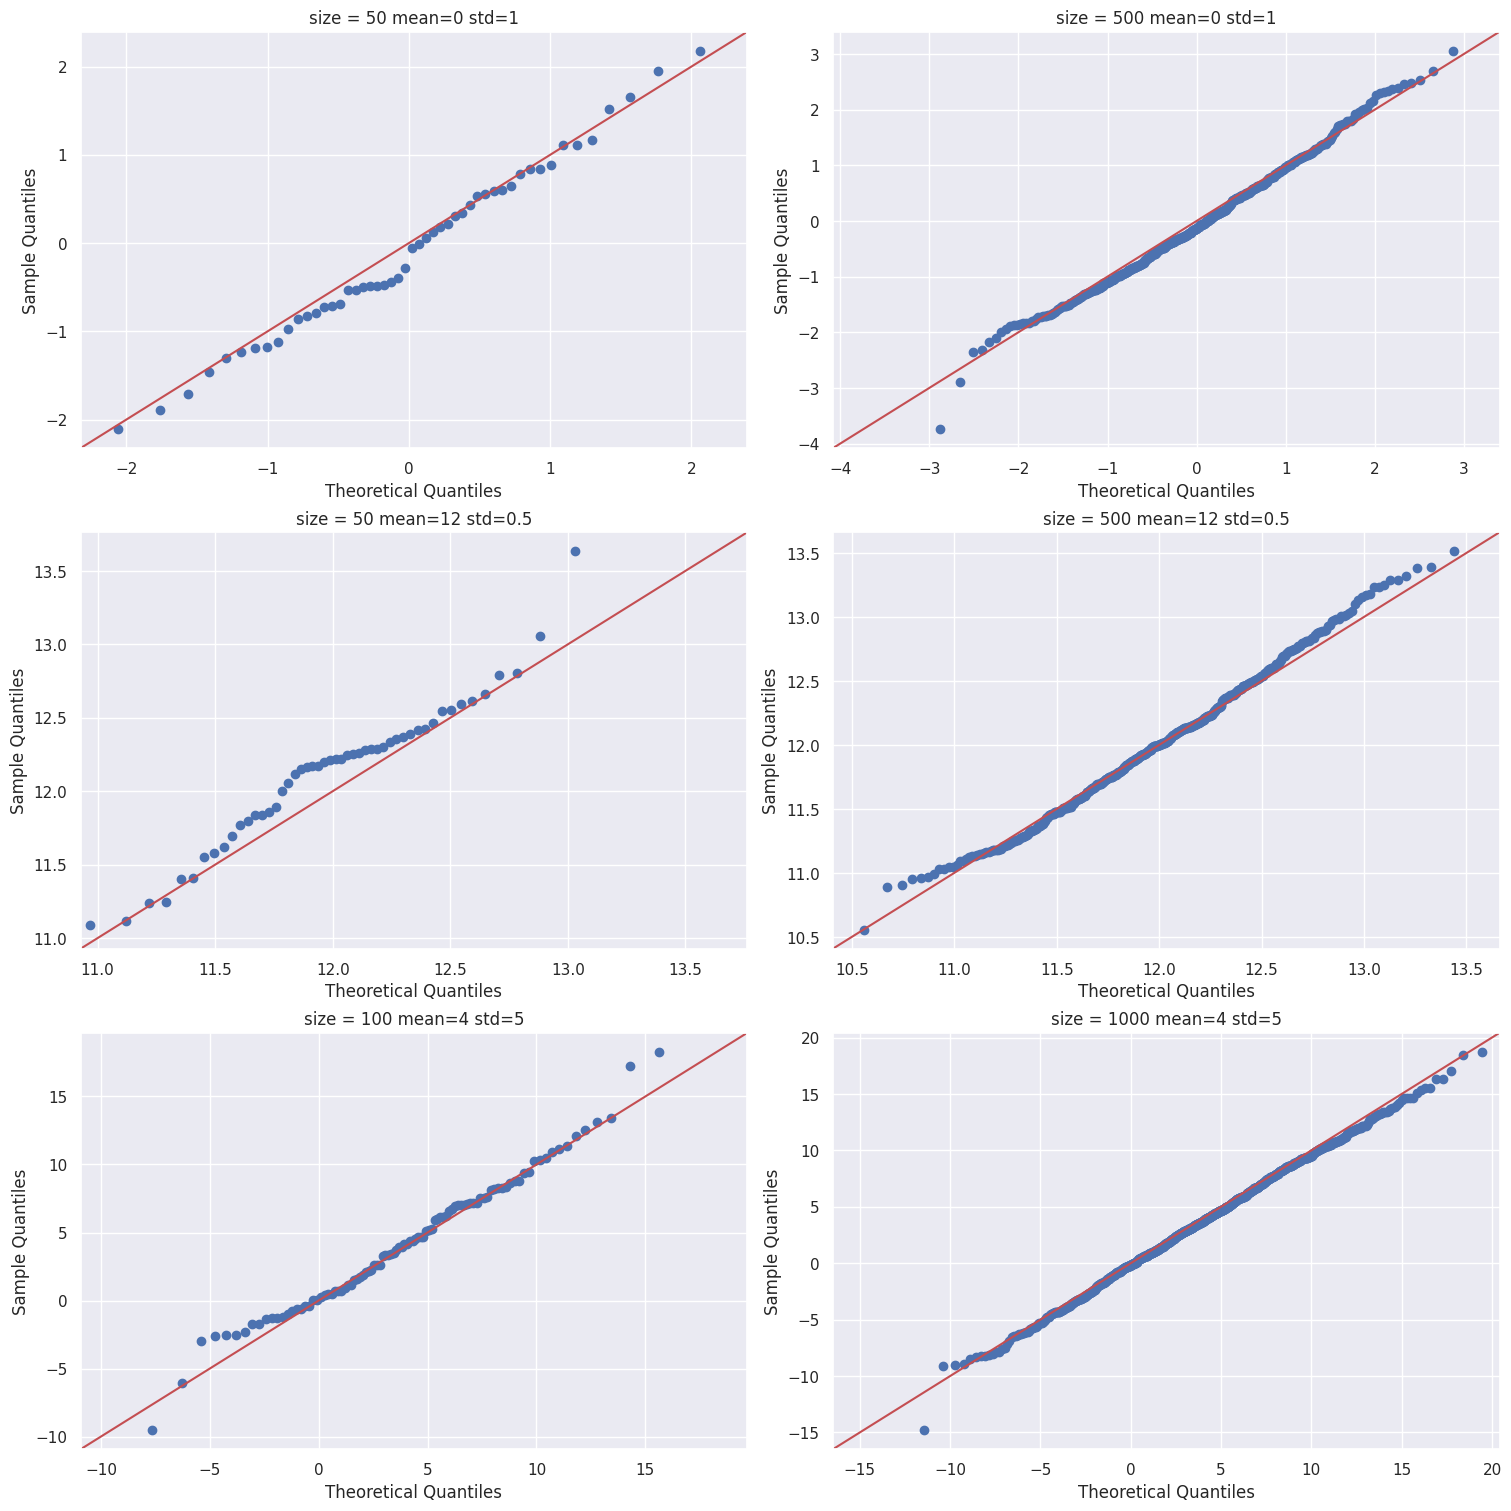

In [50]:
fig, axs = plt.subplots(3, 2, figsize=(15,15),  constrained_layout=True)

for i in range(3):
    for j in range(2):
        axs[i][j].set_title(f'size = {features[i][j][0]} mean={features[i][j][1]} std={features[i][j][2]}')
        sm.qqplot(norm[i][j], 
                  stats.norm(loc=features[i][j][1], scale=features[i][j][2]), 
                  line='45',
                  ax=axs[i][j])

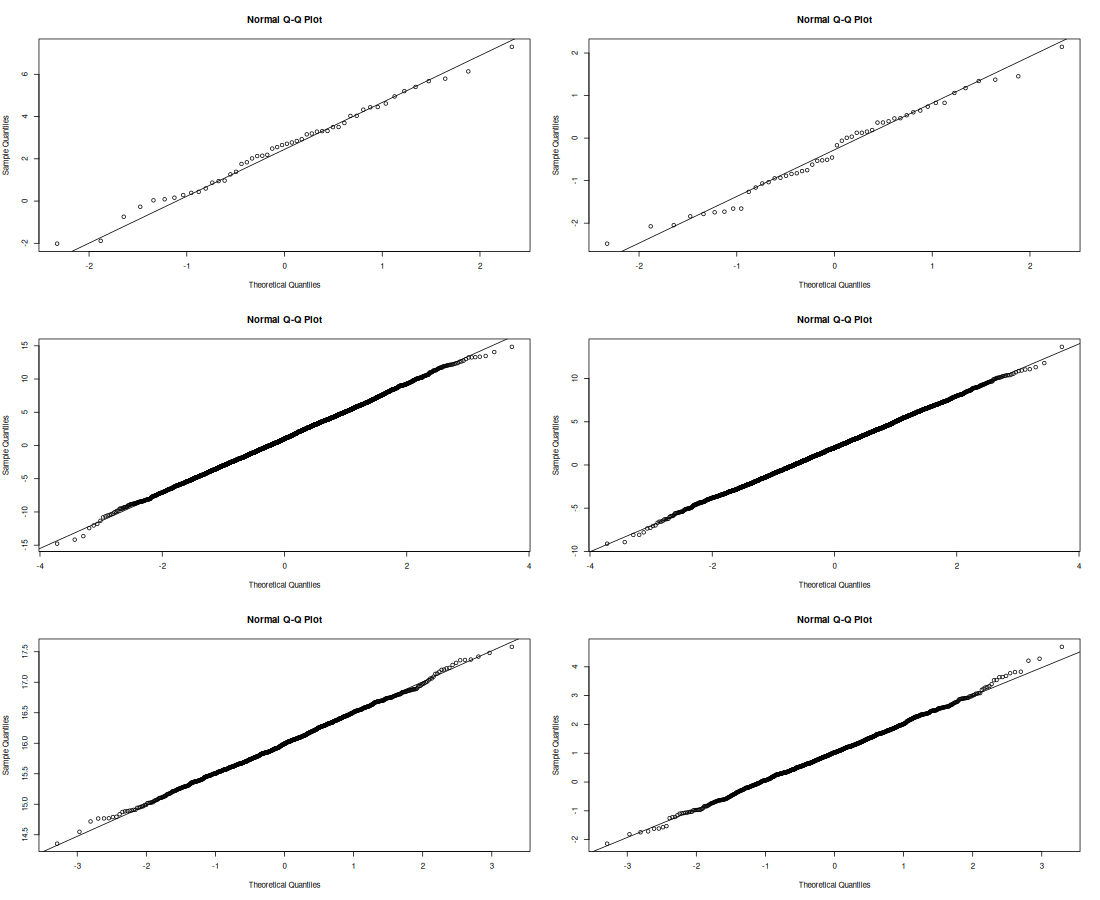

In [51]:
%%R -w 1100 -h 900
par(mfrow=c(3,2))
qqnorm(data1)
qqline(data1)

qqnorm(data2)
qqline(data2)

qqnorm(data3)
qqline(data3)

qqnorm(data4)
qqline(data4)

qqnorm(data5)
qqline(data5)

qqnorm(data6)
qqline(data6)

## Метод огибающих

Суть метода заключается в генерации бустрап выборок, построения для них QQ-plot, получается грубо говоря что-то вроде доверетельных интервалов для QQ-plot

In [52]:
%%R
envelope <- function(x) {
    z <- (x - mean(x))/sqrt(var(x))  #  Стандартизация выборки
    x.qq <- qqnorm(z, plot.it = FALSE)
    x.qq <- lapply(x.qq, sort)
    plot(x.qq, type = "n", ylim = c(-2, 5), 
         ylab = "Z-статистики выборки", 
         xlab = "Квантили НР")
    
    library(boot)
    # Генерация 999 бутстреп-выборок (т.е. случайных выборок из 
    #  нормального распределения с параметрами выборки z):
    x.gen <- function(dat, mle) rnorm(length(dat))
    x.qqboot <- boot(z, sort, R = 999, 
                     sim = "parametric",ran.gen = x.gen)
    sapply(1:999,function(i) lines(x.qq$x, x.qqboot$t[i,],
                                   type = "l", col = "grey"))
    points (x.qq, pch = 20)
    lines(c(-3, 3), c(-3, 3), col = "red", lwd = 2)
}


Attaching package: ‘boot’

The following object is masked _by_ ‘.GlobalEnv’:

    envelope



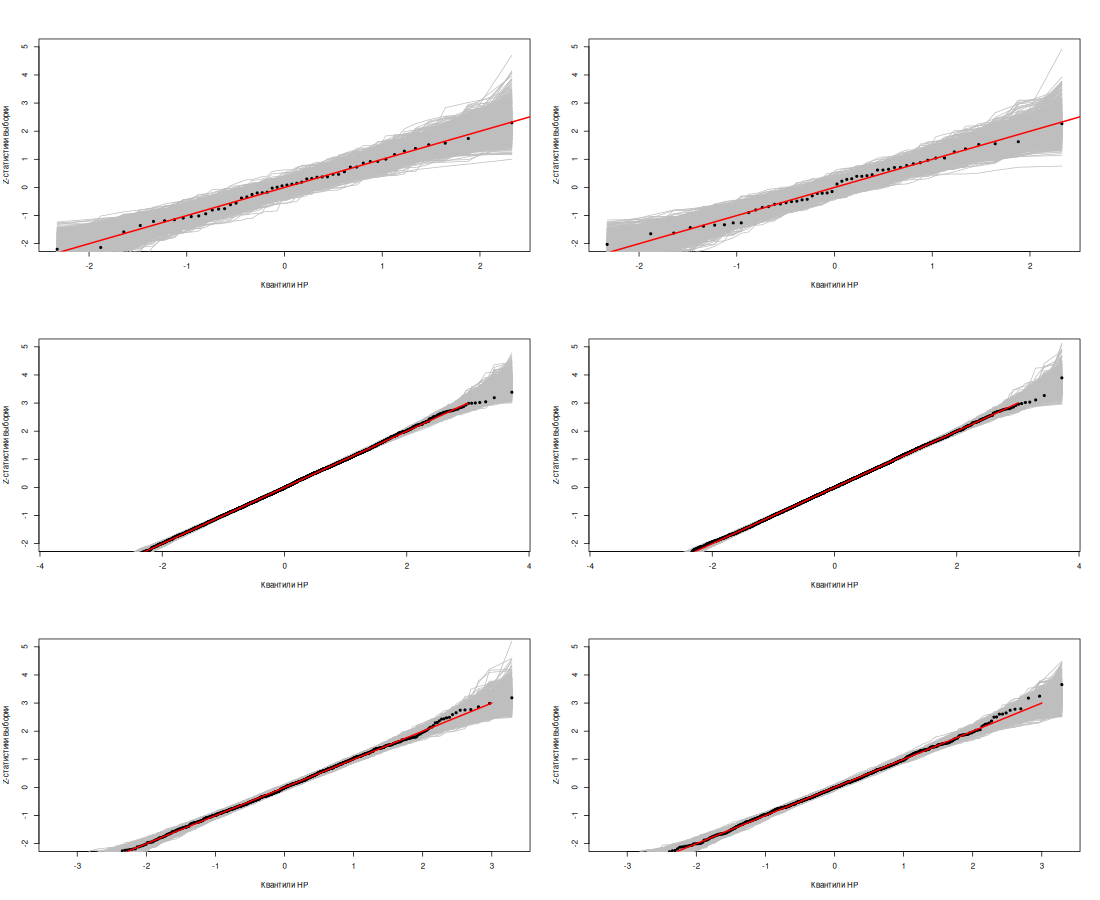

In [53]:
%%R -w 1100 -h 900
par(mfrow=c(3,2))

envelope(data1)
envelope(data2)
envelope(data3)
envelope(data4)
envelope(data5)
envelope(data6)

## Критерий Шапиро-Уилка

In [54]:
%%R
print(shapiro.test(data1))
print(shapiro.test(data2))
print(shapiro.test(data3))
print(shapiro.test(data4))
print(shapiro.test(data5))
print(shapiro.test(data6))



	Shapiro-Wilk normality test

data:  data1
W = 0.99177, p-value = 0.9785


	Shapiro-Wilk normality test

data:  data2
W = 0.98234, p-value = 0.6541


	Shapiro-Wilk normality test

data:  data3
W = 0.99968, p-value = 0.6452


	Shapiro-Wilk normality test

data:  data4
W = 0.99979, p-value = 0.9273


	Shapiro-Wilk normality test

data:  data5
W = 0.9989, p-value = 0.8182


	Shapiro-Wilk normality test

data:  data6
W = 0.99869, p-value = 0.681



In [55]:
for i in range(3):
    for j in range(2):
        print(f'size = {features[i][j][0]} mean={features[i][j][1]} std={features[i][j][2]}', stats.shapiro(norm[i][j]))
        print()


size = 50 mean=0 std=1 ShapiroResult(statistic=0.9864900708198547, pvalue=0.8332951664924622)

size = 500 mean=0 std=1 ShapiroResult(statistic=0.9948205947875977, pvalue=0.090997114777565)

size = 50 mean=12 std=0.5 ShapiroResult(statistic=0.9638032913208008, pvalue=0.12828625738620758)

size = 500 mean=12 std=0.5 ShapiroResult(statistic=0.9938506484031677, pvalue=0.04029449447989464)

size = 100 mean=4 std=5 ShapiroResult(statistic=0.9880727529525757, pvalue=0.5135858654975891)

size = 1000 mean=4 std=5 ShapiroResult(statistic=0.9989020824432373, pvalue=0.8186262845993042)



## Критерий Колмогорова-Смирнова

In [56]:
%%R
print(ks.test(data1, "pnorm"))
print(ks.test(data2, "pnorm"))
print(ks.test(data3, "pnorm"))
print(ks.test(data4, "pnorm"))
print(ks.test(data5, "pnorm"))
print(ks.test(data6, "pnorm"))


	Exact one-sample Kolmogorov-Smirnov test

data:  data1
D = 0.64046, p-value = 8.882e-16
alternative hypothesis: two-sided


	Exact one-sample Kolmogorov-Smirnov test

data:  data2
D = 0.17608, p-value = 0.0794
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data3
D = 0.39296, p-value < 2.2e-16
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data4
D = 0.50108, p-value < 2.2e-16
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data5
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data6
D = 0.40045, p-value < 2.2e-16
alternative hypothesis: two-sided



In [57]:
for i in range(3):
    for j in range(2):
        print(f'size = {features[i][j][0]} mean={features[i][j][1]} std={features[i][j][2]}',
              stats.kstest(norm[i][j], stats.norm(loc=features[i][j][1], scale=features[i][j][2]).cdf))
        print()



size = 50 mean=0 std=1 KstestResult(statistic=0.13412847311682213, pvalue=0.3017982541965317, statistic_location=-0.3964907182819327, statistic_sign=1)

size = 500 mean=0 std=1 KstestResult(statistic=0.05853067564661213, pvalue=0.06248287729986268, statistic_location=-0.2495457601454522, statistic_sign=1)

size = 50 mean=12 std=0.5 KstestResult(statistic=0.23747590713479982, pvalue=0.005775659267238442, statistic_location=12.14942913676118, statistic_sign=-1)

size = 500 mean=12 std=0.5 KstestResult(statistic=0.03227727595518515, pvalue=0.6625027778611867, statistic_location=12.690229365076362, statistic_sign=-1)

size = 100 mean=4 std=5 KstestResult(statistic=0.06289603215194364, pvalue=0.8001891680999885, statistic_location=-2.6156512834330536, statistic_sign=-1)

size = 1000 mean=4 std=5 KstestResult(statistic=0.030866759898034113, pvalue=0.2905401090389903, statistic_location=4.78189988018632, statistic_sign=1)



## Критерий Андресона

In [58]:
%%R
#install.packages('nortest')
library('nortest')
print(ad.test(data1))
print(ad.test(data2))
print(ad.test(data3))
print(ad.test(data4))
print(ad.test(data5))
print(ad.test(data6))



	Anderson-Darling normality test

data:  data1
A = 0.14471, p-value = 0.9667


	Anderson-Darling normality test

data:  data2
A = 0.31426, p-value = 0.5343


	Anderson-Darling normality test

data:  data3
A = 0.308, p-value = 0.5607


	Anderson-Darling normality test

data:  data4
A = 0.18428, p-value = 0.9088


	Anderson-Darling normality test

data:  data5
A = 0.29835, p-value = 0.5867


	Anderson-Darling normality test

data:  data6
A = 0.27799, p-value = 0.6504



In [59]:
for i in range(3):
    for j in range(2):
        print(f'size = {features[i][j][0]} mean={features[i][j][1]} std={features[i][j][2]}',
              stats.anderson(norm[i][j]))
        print()

size = 50 mean=0 std=1 AndersonResult(statistic=0.25067571312338544, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.08666560774600454, scale=0.9990215861925169)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

size = 500 mean=0 std=1 AndersonResult(statistic=0.5655894306274831, critical_values=array([0.571, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.07247026618959757, scale=1.019376028547524)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

size = 50 mean=12 std=0.5 AndersonResult(statistic=0.7201492728729519, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=12.130965071577112, scale=0.4980647460335586)
 success: True
 m

## Критерий Крамера Фон Мизеса

In [60]:
for i in range(3):
    for j in range(2):
        print(f'size = {features[i][j][0]} mean={features[i][j][1]} std={features[i][j][2]}',
              stats.cramervonmises(norm[i][j], stats.norm(loc=features[i][j][1], scale=features[i][j][2]).cdf))
        print()



size = 50 mean=0 std=1 CramerVonMisesResult(statistic=0.10133658971793615, pvalue=0.5801624277517791)

size = 500 mean=0 std=1 CramerVonMisesResult(statistic=0.5068789208762067, pvalue=0.038222192872469196)

size = 50 mean=12 std=0.5 CramerVonMisesResult(statistic=0.5748024735772665, pvalue=0.025431547560991863)

size = 500 mean=12 std=0.5 CramerVonMisesResult(statistic=0.0946086766981488, pvalue=0.6121479778961121)

size = 100 mean=4 std=5 CramerVonMisesResult(statistic=0.048935514842016886, pvalue=0.8837673446954947)

size = 1000 mean=4 std=5 CramerVonMisesResult(statistic=0.24160974075142505, pvalue=0.19949746623829645)



In [61]:
%%R
print(cvm.test(data1))
print(cvm.test(data2))
print(cvm.test(data3))
print(cvm.test(data4))
print(cvm.test(data5))
print(cvm.test(data6))



	Cramer-von Mises normality test

data:  data1
W = 0.022054, p-value = 0.9451


	Cramer-von Mises normality test

data:  data2
W = 0.051878, p-value = 0.4767


	Cramer-von Mises normality test

data:  data3
W = 0.054067, p-value = 0.453


	Cramer-von Mises normality test

data:  data4
W = 0.018621, p-value = 0.979


	Cramer-von Mises normality test

data:  data5
W = 0.051187, p-value = 0.4942


	Cramer-von Mises normality test

data:  data6
W = 0.04219, p-value = 0.6409



## Критерий Лиллиефорса

In [62]:
for i in range(3):
    for j in range(2):
        print(f'size = {features[i][j][0]} mean={features[i][j][1]} std={features[i][j][2]}',
              f'(statistic, pvalue) = {smsd.lilliefors(norm[i][j])}')
        print()



size = 50 mean=0 std=1 (statistic, pvalue) = (0.10176839688744654, 0.22146283595747326)

size = 500 mean=0 std=1 (statistic, pvalue) = (0.028953189121544154, 0.4658433560947688)

size = 50 mean=12 std=0.5 (statistic, pvalue) = (0.1347860483325637, 0.023619046503264365)

size = 500 mean=12 std=0.5 (statistic, pvalue) = (0.034193895227339066, 0.22112111312909094)

size = 100 mean=4 std=5 (statistic, pvalue) = (0.049945975092953454, 0.7816253236296159)

size = 1000 mean=4 std=5 (statistic, pvalue) = (0.01343525796831957, 0.9612309451968727)



In [63]:
%%R
print(lillie.test(data1))
print(lillie.test(data2))
print(lillie.test(data3))
print(lillie.test(data4))
print(lillie.test(data5))
print(lillie.test(data6))



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data1
D = 0.055456, p-value = 0.9635


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data2
D = 0.076253, p-value = 0.6627


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data3
D = 0.0074816, p-value = 0.7135


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data4
D = 0.0054732, p-value = 0.9732


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data5
D = 0.020932, p-value = 0.3579


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data6
D = 0.018487, p-value = 0.5586



# Задание 6

<Axes: xlabel='Black Rating', ylabel='Count'>

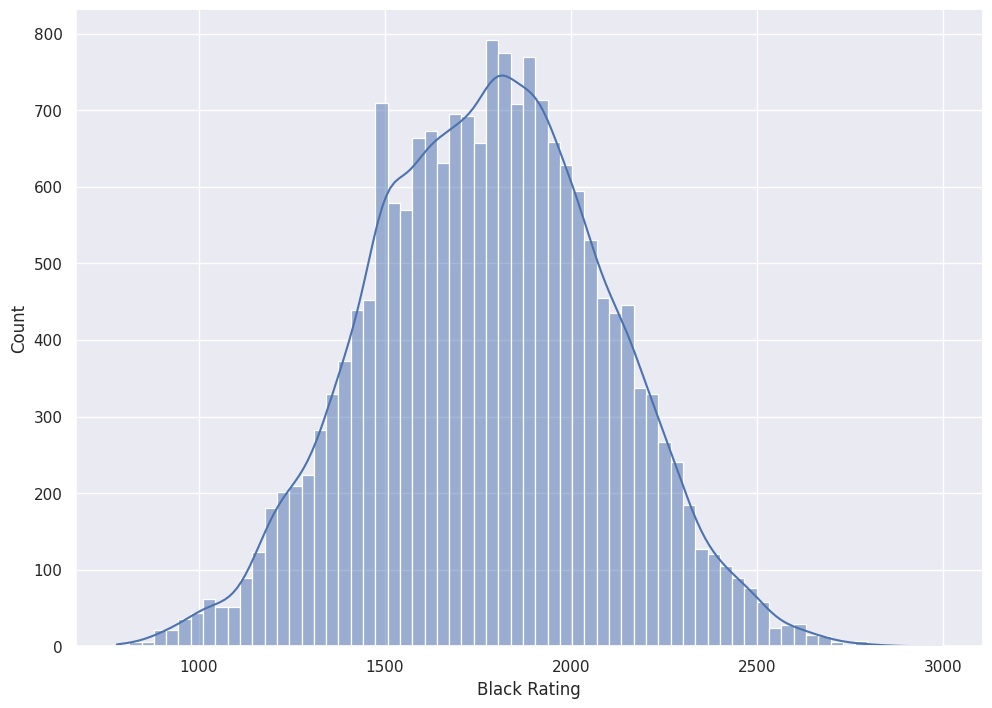

In [64]:
sns.histplot(df["Black Rating"], kde=True)

## Эмирическая функция распределения

Text(0.5, 1.0, 'Эмирическая функция распредления')

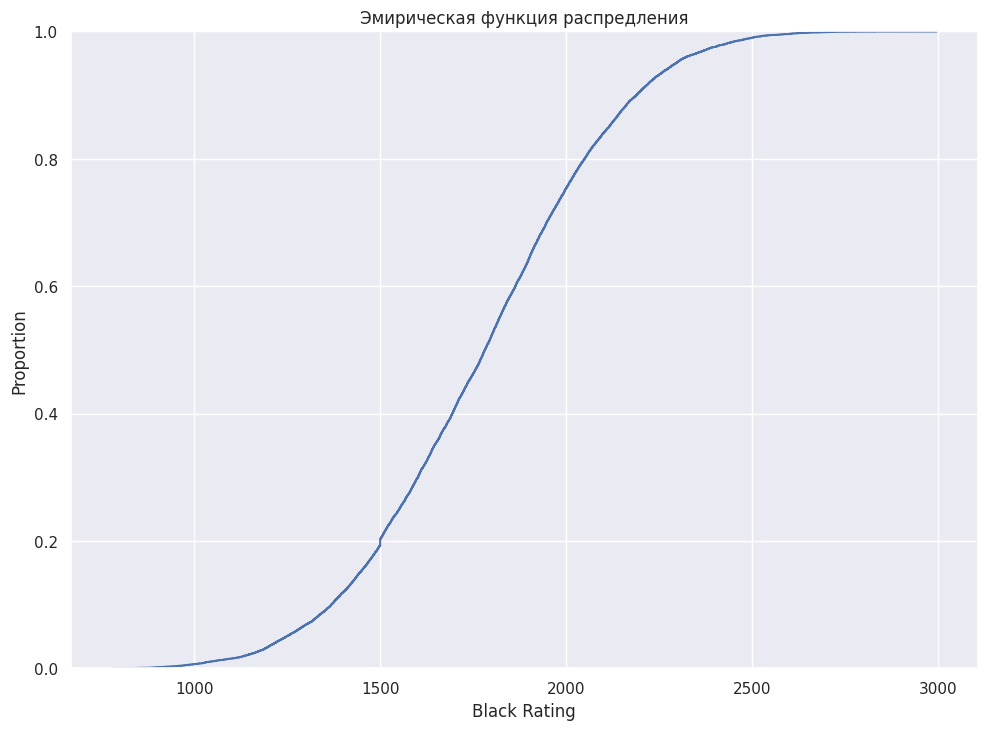

In [65]:
sns.ecdfplot(data=df["Black Rating"])
plt.title('Эмирическая функция распредления')

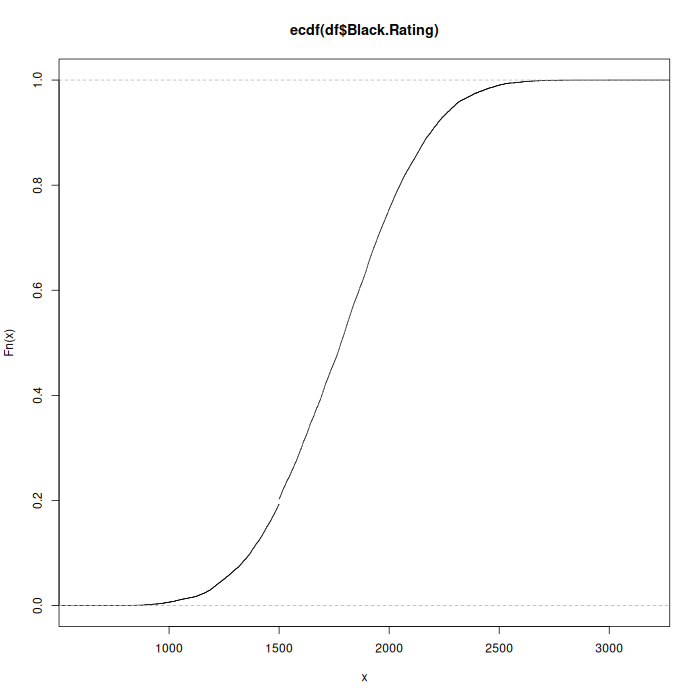

In [66]:
%%R -w 700 -h 700
plot(ecdf(df$Black.Rating))

## Квантиль-квантиль график

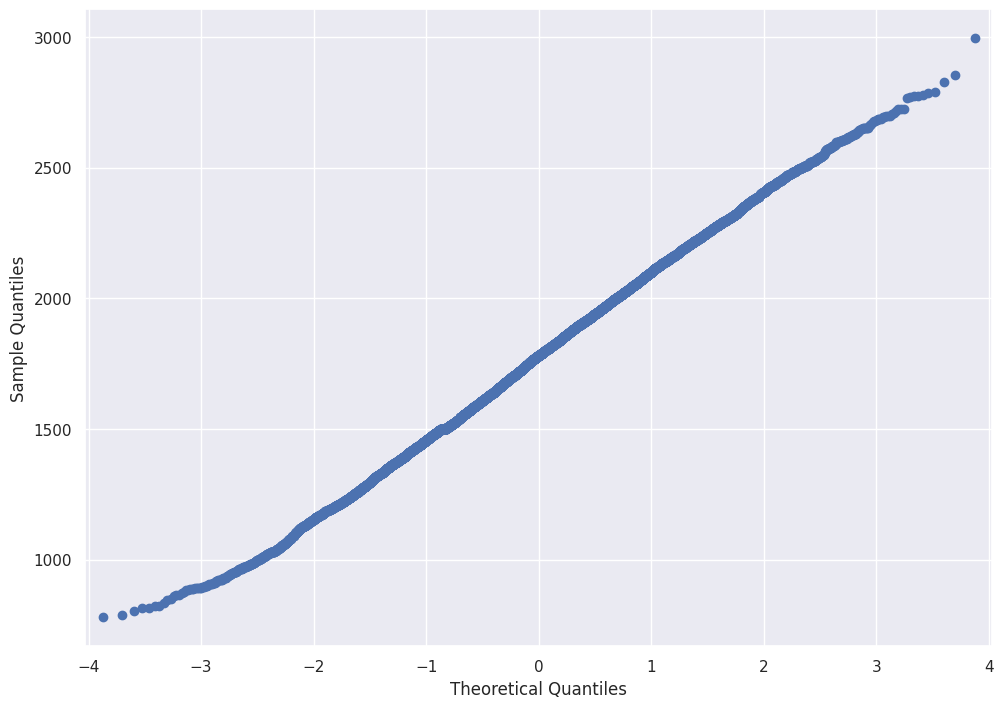

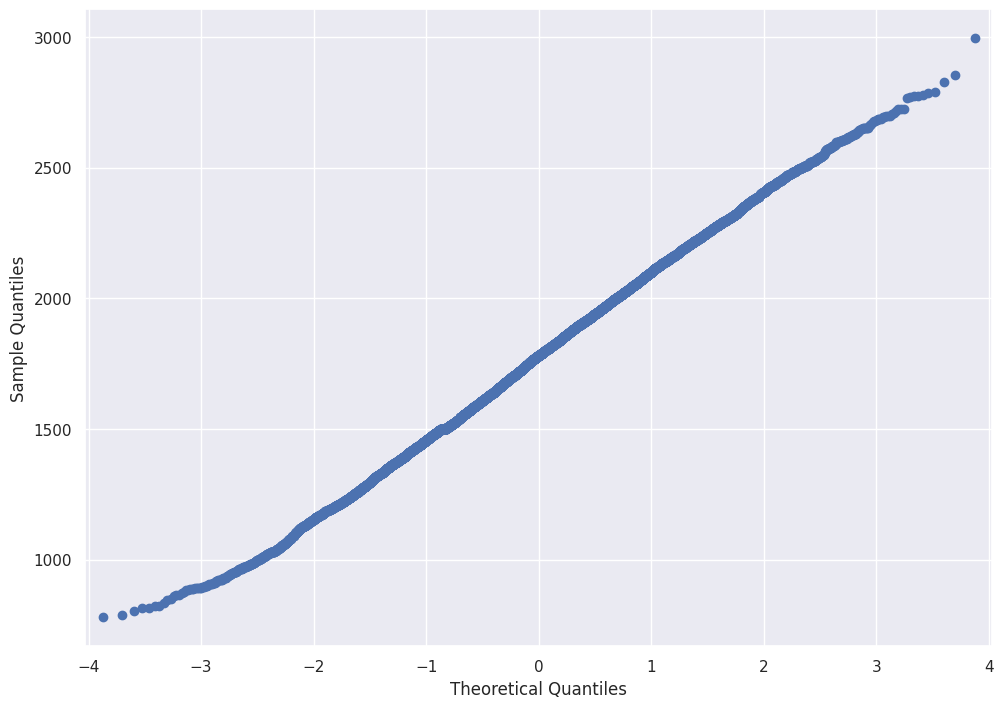

In [67]:
sm.qqplot(data=df['Black Rating'])

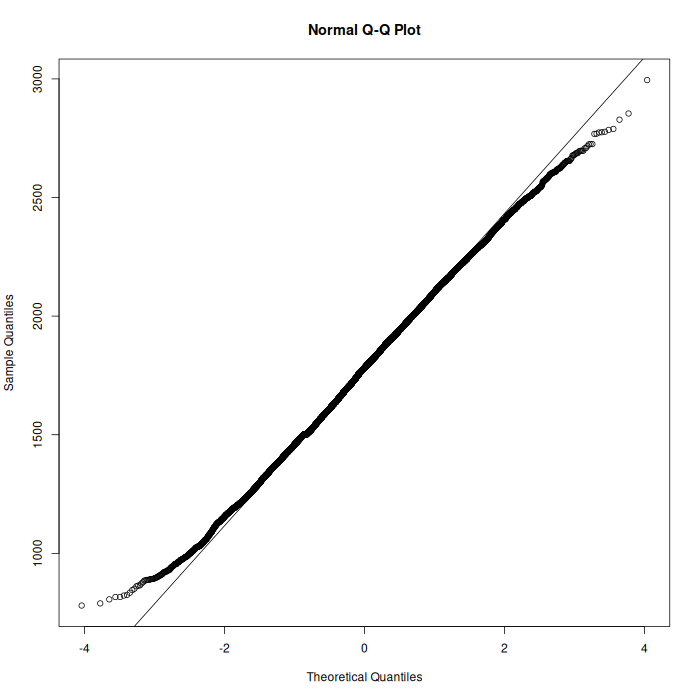

In [68]:
%%R -w 700 -h 700
qqnorm(df$Black.Rating)
qqline(df$Black.Rating)

## Метод огибающих

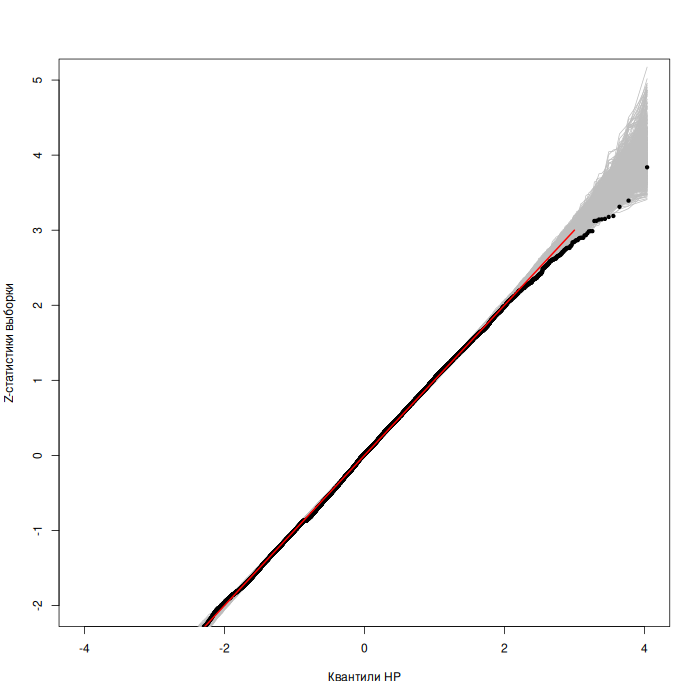

In [69]:
%%R -h 700 -w 700
envelope(df$Black.Rating)

Можем видеть, что правый хвост нашего распределения не похож на нормальное распредление - там есть выбросы

## Тест Шапиро-Уилка

In [70]:
%%R
shapiro.test(df$Black.Rating[sample(18636, 5000)])


	Shapiro-Wilk normality test

data:  df$Black.Rating[sample(18636, 5000)]
W = 0.99905, p-value = 0.006428



In [71]:
stats.shapiro(df['Black Rating'])

ShapiroResult(statistic=0.9991525411605835, pvalue=4.44163212875992e-08)

Реализация теста в R требует, чтобы объем выборки был меньше 5000, поэтому получаем большее значение p-value

## Тест Колмогорова-Смирнова

In [72]:
data = df['Black Rating']
stats.kstest(data, stats.norm(loc=np.mean(data), scale=np.mean(data)).cdf)

KstestResult(statistic=0.34079809802938954, pvalue=0.0, statistic_location=1162, statistic_sign=-1)

In [73]:
%%R
ks.test(df$Black.Rating, y='pnorm')


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  df$Black.Rating
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided



## Тест Андерсона-Дарлинга

In [74]:
smsd.normal_ad(data)

(3.591138187184697, 5.778954275580882e-09)

In [75]:
%%R
ad.test(df$Black.Rating)


	Anderson-Darling normality test

data:  df$Black.Rating
A = 3.5911, p-value = 5.779e-09



## Тест Крамер-Вон-Мизеса

In [76]:
stats.cramervonmises(data, stats.norm(loc=np.mean(data), scale=np.mean(data)).cdf)

CramerVonMisesResult(statistic=901.37222707997, pvalue=1.9566660958147963e-07)

In [77]:
%%R
cvm.test(df$Black.Rating)


	Cramer-von Mises normality test

data:  df$Black.Rating
W = 0.64662, p-value = 1.572e-07



В R получаем большее значение p-value

## Тест Лиллиефорса

In [78]:
smsd.lilliefors(data)

(0.014068350039051186, 0.0009999999999998899)

In [79]:
%%R
lillie.test(df$Black.Rating)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  df$Black.Rating
D = 0.014068, p-value = 1.003e-08



Видно, что при любом адекватном уровне значимости гипотеза о нормальности распредления отвергается, это связано с тем, что критерии являются достаточно мощными.

# Задание 7

In [81]:
norm0_1 = stats.norm.rvs(loc=0, scale=1, size=50)
norm2_2 = stats.norm.rvs(loc=2, scale=2, size=50)
norm0_4 = stats.norm.rvs(loc=0, scale=4, size=50)

## Тест Стьюдента

Вообще говоря тест Стьюдента работает для выборок, у которых средние распределенны нормально, что автоматически выполнено для выборок из нормального распределения, для начала посмотрим как он ведет себя на искусственно созданных данных

In [82]:
for alternative in ['two-sided', 'less', 'greater']:
    a = stats.ttest_ind(norm0_1,
                norm2_2,
                alternative=alternative,
               )
    print(f'Альтернатива - {alternative} \n',
            a, '\n',
            f'Уровень значимости \n \t 0.9 {a.confidence_interval(0.9)} \n \t 0.95 {a.confidence_interval(0.95)}\n \t 0.99 {a.confidence_interval(0.99)} '
         )
    print()

Альтернатива - two-sided 
 TtestResult(statistic=-6.50640234597847, pvalue=3.274347879154146e-09, df=98.0) 
 Уровень значимости 
 	 0.9 ConfidenceInterval(low=-2.544596285978217, high=-1.5098328513730825) 
 	 0.95 ConfidenceInterval(low=-2.645519604355314, high=-1.408909532995985)
 	 0.99 ConfidenceInterval(low=-2.8456934611784472, high=-1.2087356761728518) 

Альтернатива - less 
 TtestResult(statistic=-6.50640234597847, pvalue=1.637173939577073e-09, df=98.0) 
 Уровень значимости 
 	 0.9 ConfidenceInterval(low=-inf, high=-1.6252084732486538) 
 	 0.95 ConfidenceInterval(low=-inf, high=-1.5098328513730825)
 	 0.99 ConfidenceInterval(low=-inf, high=-1.2903453918552406) 

Альтернатива - greater 
 TtestResult(statistic=-6.50640234597847, pvalue=0.999999998362826, df=98.0) 
 Уровень значимости 
 	 0.9 ConfidenceInterval(low=-2.4292206641026453, high=inf) 
 	 0.95 ConfidenceInterval(low=-2.5445962859782165, high=inf)
 	 0.99 ConfidenceInterval(low=-2.7640837454960585, high=inf) 



Давайте проверем гипотезу о равенстве средних рейтингов черных для дебютов C61 и C62, оба из которых являются продолжением Испанской партии.

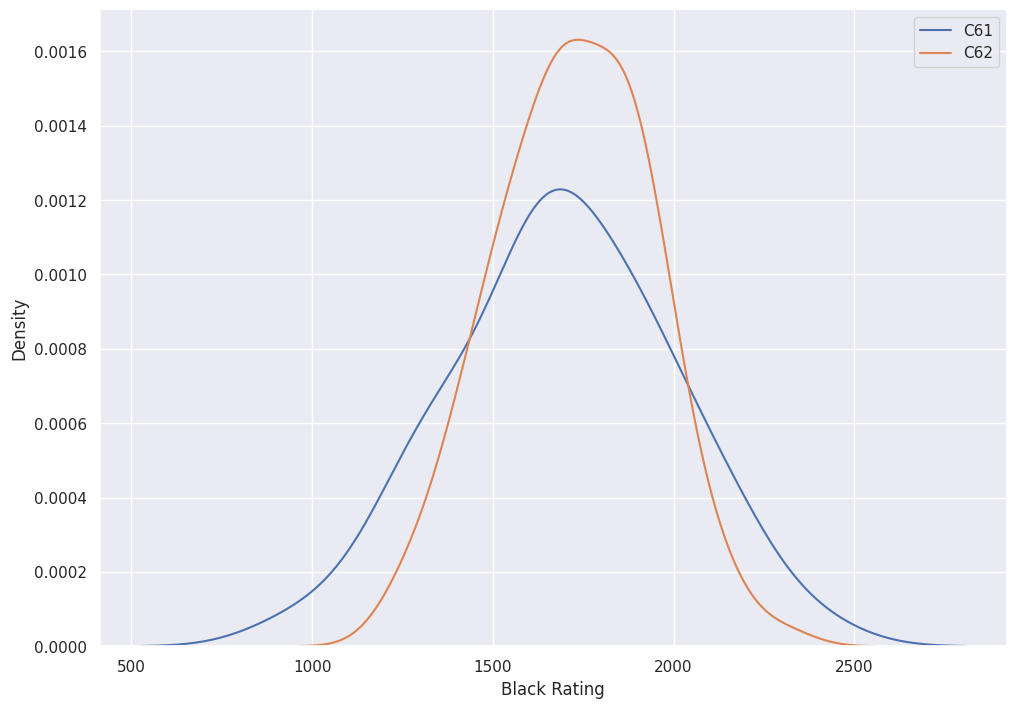

In [178]:
sns.kdeplot(df[df['Opening ECO'] == 'C61']['Black Rating'], label='C61')
sns.kdeplot(df[df['Opening ECO'] == 'C62']['Black Rating'], label='C62')
plt.legend()

In [84]:
print(stats.shapiro(df[df['Opening ECO'] == 'C61']['Black Rating']), '\n')
print(stats.shapiro(df[df['Opening ECO'] == 'C62']['Black Rating']))

ShapiroResult(statistic=0.9906298518180847, pvalue=0.9649788737297058) 

ShapiroResult(statistic=0.9944961071014404, pvalue=0.9137508273124695)


Гипотеза о нормальности при уровне значимости 0.05 не отвергается

In [85]:
stats.ttest_ind(df[df['Opening ECO'] == 'C61']['Black Rating'], df[df['Opening ECO'] == 'C62']['Black Rating'])

TtestResult(statistic=-0.8338237848907273, pvalue=0.4055503573408821, df=170.0)

При уровне значимости 0.05 гипотезу не отвергаем, заметим что у нас большие по объему выборки и поэтому здесь T test вырождается в Z тест

Давайте попробуем провести Тест Стьюдента для данных не распределенных нормально, например для количества неточностей совершаемых белыми на этих же дебютах

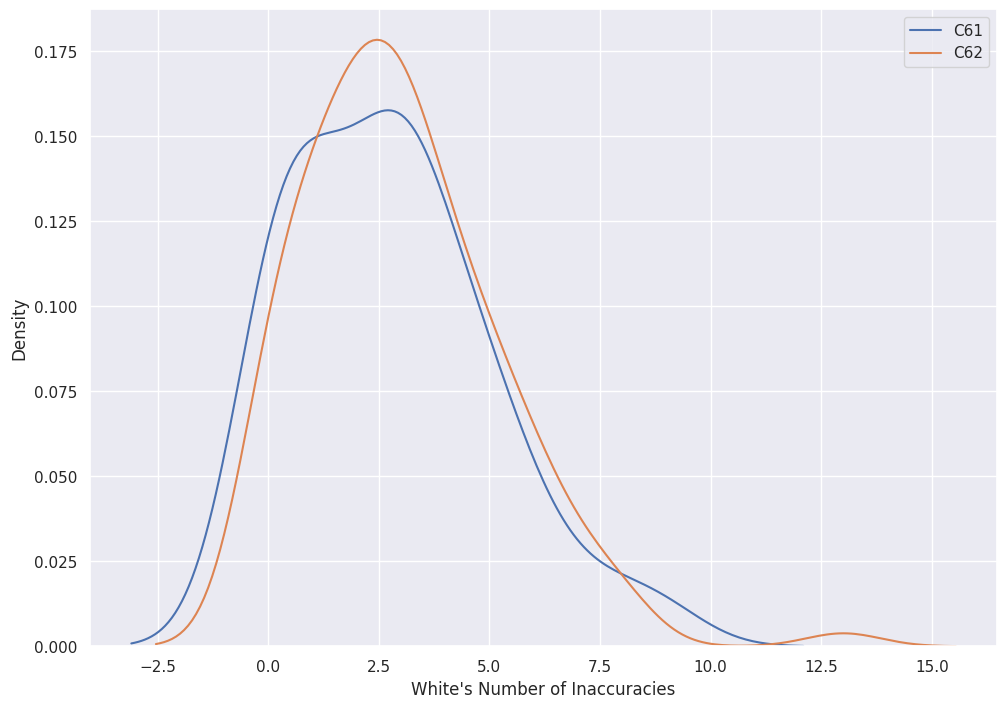

In [177]:
sns.kdeplot(df[df['Opening ECO'] == 'C61']["White's Number of Inaccuracies"], label='C61')
sns.kdeplot(df[df['Opening ECO'] == 'C62']["White's Number of Inaccuracies"], label='C62')
plt.legend()

In [87]:
print(stats.shapiro(df[df['Opening ECO'] == 'C61']["White's Number of Inaccuracies"]), '\n')
print(stats.shapiro(df[df['Opening ECO'] == 'C61']["White's Number of Inaccuracies"]))

ShapiroResult(statistic=0.9230893850326538, pvalue=0.003826756728813052) 

ShapiroResult(statistic=0.9230893850326538, pvalue=0.003826756728813052)


Действительно при уровне значимости 0.05 гипотезу о нормальной распределенности отвергаем, т.е. достаточное условие применимости теста Стьюдента не выполнено, давайте тогда посмотрим на распредление средних, для этого будем бустрапировать из наших данных

<Axes: ylabel='Count'>

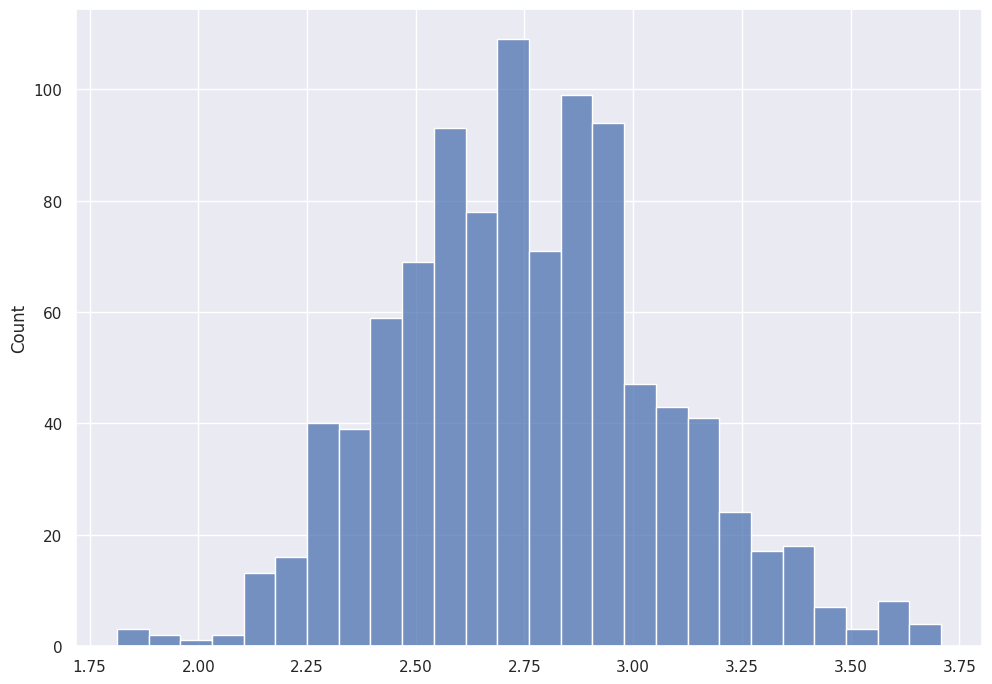

In [88]:
data1 = df[df['Opening ECO'] == 'C61']["White's Number of Inaccuracies"]
data2 = df[df['Opening ECO'] == 'C62']["White's Number of Inaccuracies"]
means = []
for i in range(1000):
    indx = np.random.choice(data1.shape[0], data1.shape[0])
    means.append(np.mean(data1.iloc[indx]))
sns.histplot(means)

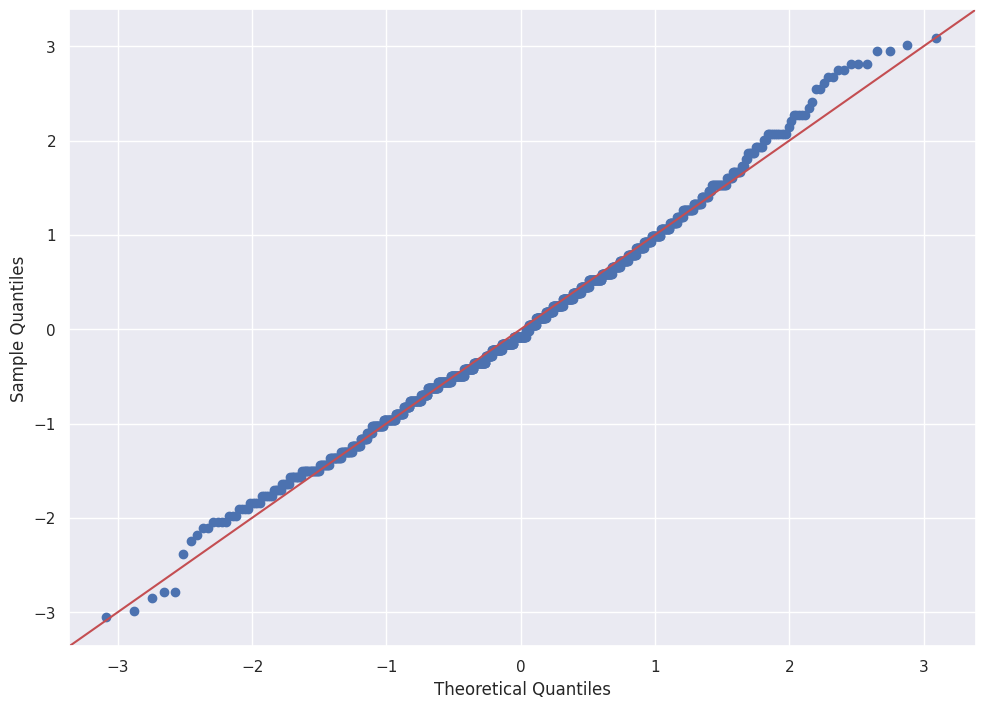

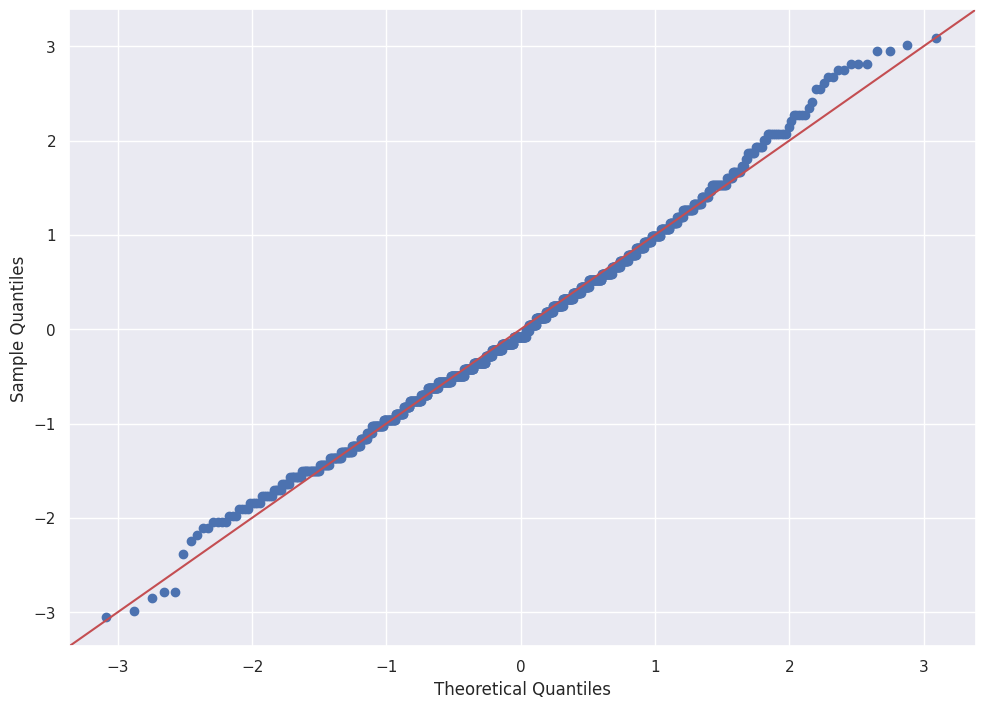

In [89]:
sm.qqplot(data=np.array(means), line='45', fit=True)

In [90]:
stats.shapiro(means)

ShapiroResult(statistic=0.9947277307510376, pvalue=0.0014627245254814625)

Действительно видим, что гипотеза о нормальности средних не отвергается, можем использовать тест

Есть еще один способ проверить будет ли работать тест на практике - нужно смотреть на распределение p-value при бутстрапировании, если тест будет работать, то p-value будет распредлено равномерно.
Это следует из того, что \
$\mathbb{P} (pvalue < \alpha | H_0) = \alpha $

In [115]:

p_values = []
for i in range(10000):
    indx1 = np.random.choice(data1.shape[0], data1.shape[0])
    indx2 = np.random.choice(data1.shape[0], data1.shape[0])
    p_values.append(stats.ttest_ind(data1.iloc[indx1], data1.iloc[indx2]).pvalue)

<Axes: ylabel='Count'>

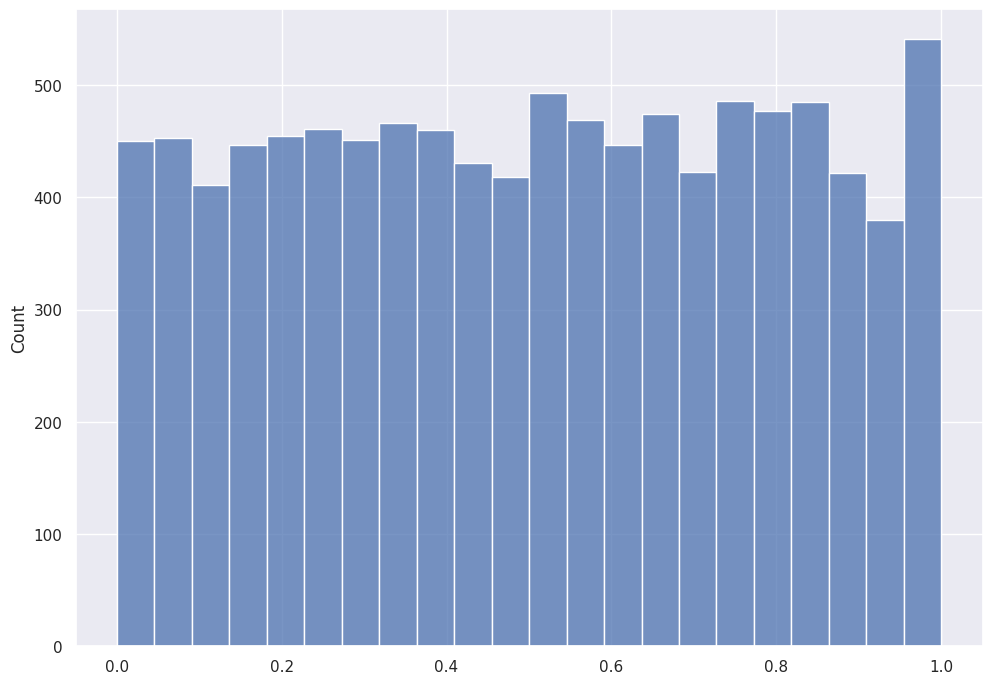

In [116]:
sns.histplot(p_values)

Видим, что p-value распределены примерно равномерно, значит можем попробовать применить Тест Стьюдента

In [93]:
stats.ttest_ind(data1, data2)

TtestResult(statistic=-0.682939816276822, pvalue=0.4955745066274826, df=170.0)

p-value > 0.05 значит не отвергаем гипотезу о равенстве средних

Тоже самое сделаем на R

In [94]:
%%R -i data1 -i data2

t.test(data1, data2)


	Welch Two Sample t-test

data:  data1 and data2
t = -0.68045, df = 84.906, p-value = 0.4981
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0121338  0.4960047
sample estimates:
mean of x mean of y 
 2.750000  3.008065 



Получаем то же значение статистик и p-value

## Тест Уилксона-Манна-Уитни

Также называемый U test, является непараметрическим тестом и используется для проверки гипотезы о равенстве распредлений выборок малых размеров, альтернавтивная гипотезе заключается в том что одно распредление сдвинуту относительно другого на некоторое значение

In [95]:
first = stats.norm.rvs(loc=0, scale=1, size=10)
second =  stats.norm.rvs(loc=0, scale=12, size=10)

for alternative in ['two-sided', 'less', 'greater']:
    a = stats.mannwhitneyu(first,
            second,
            alternative=alternative,
           )
    print(f'Альтернатива - {alternative}\n', a)
    print()

Альтернатива - two-sided
 MannwhitneyuResult(statistic=60.0, pvalue=0.47267559351158717)

Альтернатива - less
 MannwhitneyuResult(statistic=60.0, pvalue=0.7863223430510962)

Альтернатива - greater
 MannwhitneyuResult(statistic=60.0, pvalue=0.23633779675579358)



Тут гипотеза о равенстве распределений не отвергается

Теперь давайте посмотрим на результат теста, если ей подать выборки не из нормального распредления, возьмем опять те же дебюты.

In [96]:
stats.mannwhitneyu(data1, data2)

MannwhitneyuResult(statistic=2766.5, pvalue=0.47064909055420057)

При уровне значимости 0.05 гипотеза не отвергается, т.е. гипотеза о равенстве распределений не отвергается

In [97]:
%%R 
wilcox.test(data1, data2)


	Wilcoxon rank sum test with continuity correction

data:  data1 and data2
W = 2766.5, p-value = 0.4706
alternative hypothesis: true location shift is not equal to 0



## Тест Фишера 

Тест фишера для проверки гипотезы о равенстве дисперсий, он очень чувствителен к нормальности данных, поэтому как обычно сначала на искуственных данных

In [98]:
def f_test(x, y, alt="two_sided"):
    """
    Calculates the F-test.
    :param x: The first group of data
    :param y: The second group of data
    :return: a tuple with the F statistic value and the p-value.
    """
    df1 = len(x) - 1
    df2 = len(y) - 1
    f = x.var() / y.var()
    p = 2* min(stats.f.cdf(f, df1, df2), 1-stats.f.cdf(f, df1, df2))
  
    return f, p


print('Для выборок со средними (0, 2) и стандартными отклонениям (1, 2)', f_test(norm0_1, norm2_2))
print('Для выборок со средними (0, 10) и стандартными отклонениям (1, 1)', f_test(norm0_1, stats.norm.rvs(loc=10, scale=1, size=50)))

Для выборок со средними (0, 2) и стандартными отклонениям (1, 2) (0.306855439725935, 6.246260513618872e-05)
Для выборок со средними (0, 10) и стандартными отклонениям (1, 1) (1.1501044116697923, 0.6264025349578326)


В первом случае гипотеза о равенстве отвергается, во втором нет

Посмотрим на данные, у которых гипотеза о нормальности не отвергалась

In [99]:
f_test(df[df['Opening ECO'] == 'C61']["White's Number of Inaccuracies"],
df[df['Opening ECO'] == 'C62']["White's Number of Inaccuracies"])

(1.016542475906104, 0.9173853372889407)

Гипотеза о равенстве дисперсий не отвергается

Давайте посмотрим на наши распределения, которые мы обсуждали в тесте Стьюдента

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


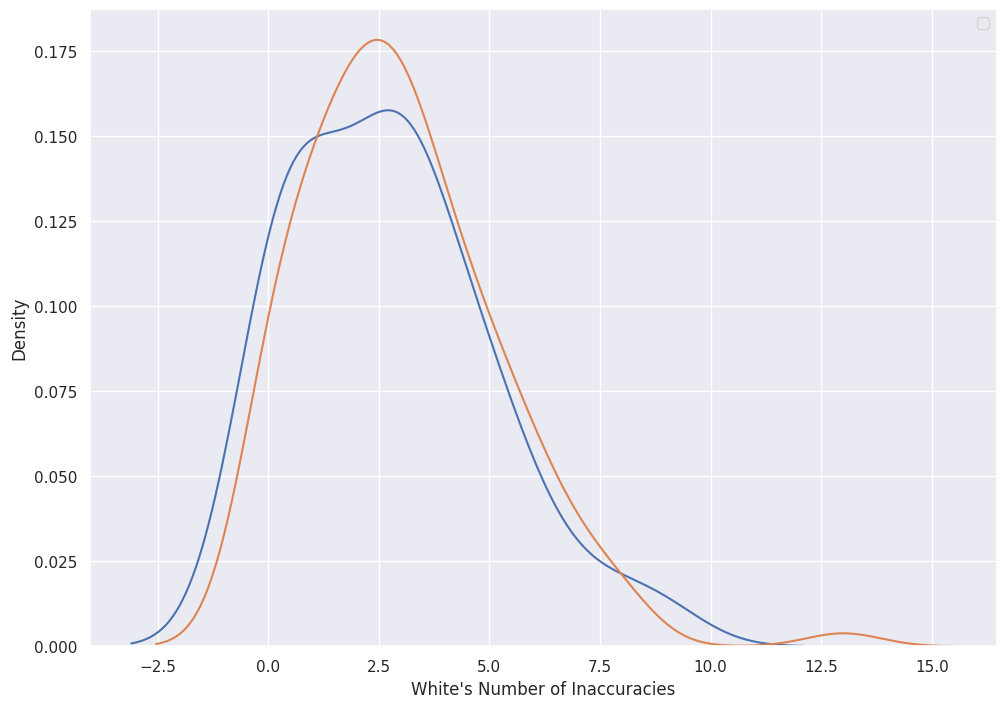

In [175]:
sns.kdeplot(data1)
sns.kdeplot(data2)
plt.legend()

Как мы помним гипотеза о нормальности была отвергнута, но давайте посмотрим на распредление p-value

In [117]:

p_values = []
for i in range(10000):
    indx1 = np.random.choice(data1.shape[0], data1.shape[0])
    indx2 = np.random.choice(data1.shape[0], data1.shape[0])
    p_values.append(f_test(data1.iloc[indx1], data1.iloc[indx2])[1])

<Axes: ylabel='Count'>

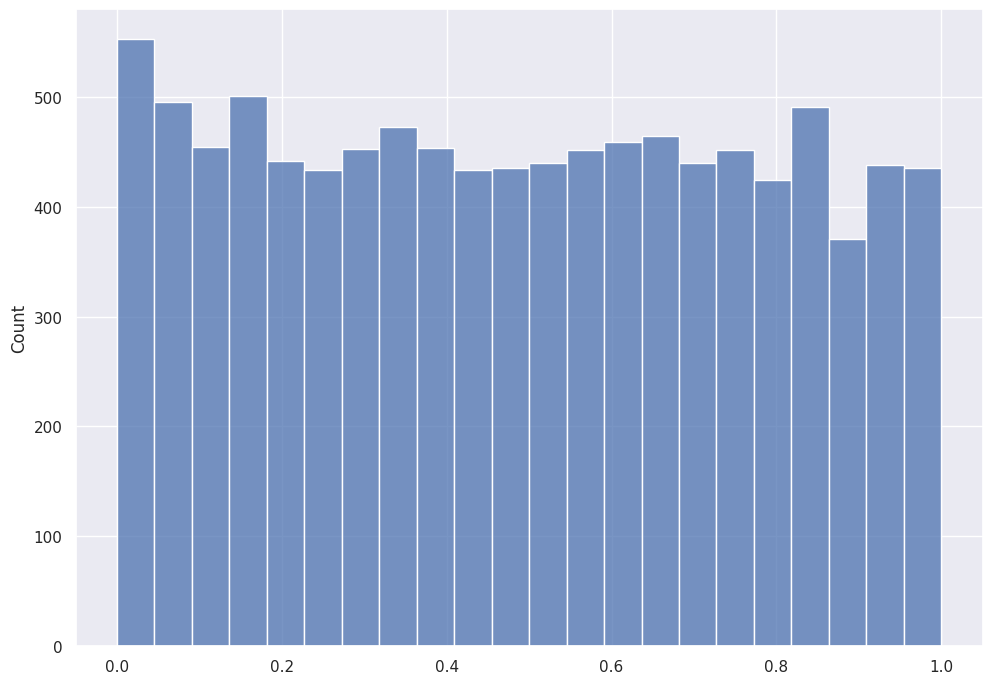

In [118]:
sns.histplot(p_values)

Действительно распредление p-value похоже на равномерное,  поэтому мы можем доверять результу теста

In [119]:
f_test(data1, data2)

(1.016542475906104, 0.9173853372889407)

In [104]:
%%R

var.test(data1, data2)


	F test to compare two variances

data:  data1 and data2
F = 1.0165, num df = 47, denom df = 123, p-value = 0.9174
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6456226 1.6858766
sample estimates:
ratio of variances 
          1.016542 



p-value больше 0.05, гипотезу не отвергаем

## Тест Левене

Тест Левене так же как и тест Фишера проверяет гипотезу о равенстве дисперсий, но он уже может работать не только с нормально распределенными данынми, а также более устойтив к выбросам 

In [105]:
print('Для выборок со стандартными отклонениями (1, 2, 4)\n\t', stats.levene(norm0_1, norm2_2, norm0_4))
print()

print('Для выборок со стандартными отклонениями (5, 5, 5) и разными средними\n\t',
      stats.levene(stats.norm.rvs(loc=50, scale=5, size=50),
                   stats.norm.rvs(loc=0, scale=5, size=50),
                   stats.norm.rvs(loc=200, scale=5, size=50)))

Для выборок со стандартными отклонениями (1, 2, 4)
	 LeveneResult(statistic=29.93053613670915, pvalue=1.2457600398378696e-11)

Для выборок со стандартными отклонениями (5, 5, 5) и разными средними
	 LeveneResult(statistic=1.8786848195991295, pvalue=0.15644099662004085)


Давайте посмотрим, что покажет нам тест Левене на данных, к которым не применим тест Фишера

In [129]:

p_values = []
for i in range(10000):
    indx1 = np.random.choice(data1.shape[0], data1.shape[0])
    indx2 = np.random.choice(data1.shape[0], data1.shape[0])
    p_values.append(stats.levene(data1.iloc[indx1], data1.iloc[indx2]).pvalue)

<Axes: ylabel='Count'>

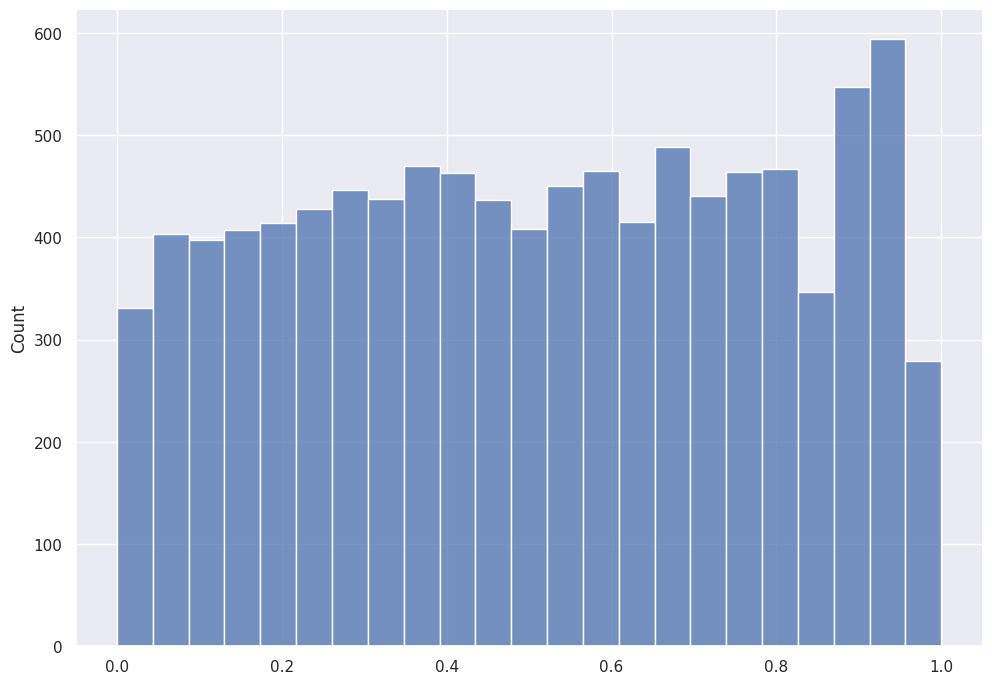

In [130]:
sns.histplot(p_values)

Здесь ситуация уже выглядит хуже, имеем проблему на концах распределения, давайте проверим распределение на равномерность на отрезке $[0, 1]$с помощью критерия Колмогорова-Смирнова

In [131]:
stats.kstest(p_values, stats.uniform.cdf)

KstestResult(statistic=0.027900000000000036, pvalue=3.394275707129564e-07, statistic_location=1.0, statistic_sign=-1)

При уровне значимости 0.05 гипотезу отвергаем, значит опять тест использовать некорректно, но мы все же используем

In [109]:
stats.levene(data1, data2)

LeveneResult(statistic=0.07123569598027911, pvalue=0.7898695198433205)

Хоть здесь и не совсем корректно сравнивать, но мы получили pvalue меньше чем в тесте Фишера

## Тест Бартлетта

Тест бартлетта тоже лучше справляется чем тест Фишера, а также требователен к нормальности данных

In [85]:
print('Для выборок со стандартными отклонениями (1, 2, 4)\n\t', stats.bartlett(norm0_1, norm2_2, norm0_4))
print()

print('Для выборок со стандартными отклонениями (5, 5, 5) и разными средними\n\t',
      stats.bartlett(stats.norm.rvs(loc=50, scale=5, size=50),
                   stats.norm.rvs(loc=0, scale=5, size=50),
                   stats.norm.rvs(loc=200, scale=5, size=50)))

Для выборок со стандартными отклонениями (1, 2, 4)
	 BartlettResult(statistic=49.45528371730028, pvalue=1.8235664368181294e-11)

Для выборок со стандартными отклонениями (5, 5, 5) и разными средними
	 BartlettResult(statistic=2.009011076660674, pvalue=0.36622567460024297)


В первом случае гипотеза отвергается, во втором нет

In [126]:

p_values = []
for i in range(10000):
    indx1 = np.random.choice(data1.shape[0], data1.shape[0])
    indx2 = np.random.choice(data1.shape[0], data1.shape[0])
    p_values.append(stats.bartlett(data1.iloc[indx1], data1.iloc[indx2]).pvalue)

<Axes: ylabel='Count'>

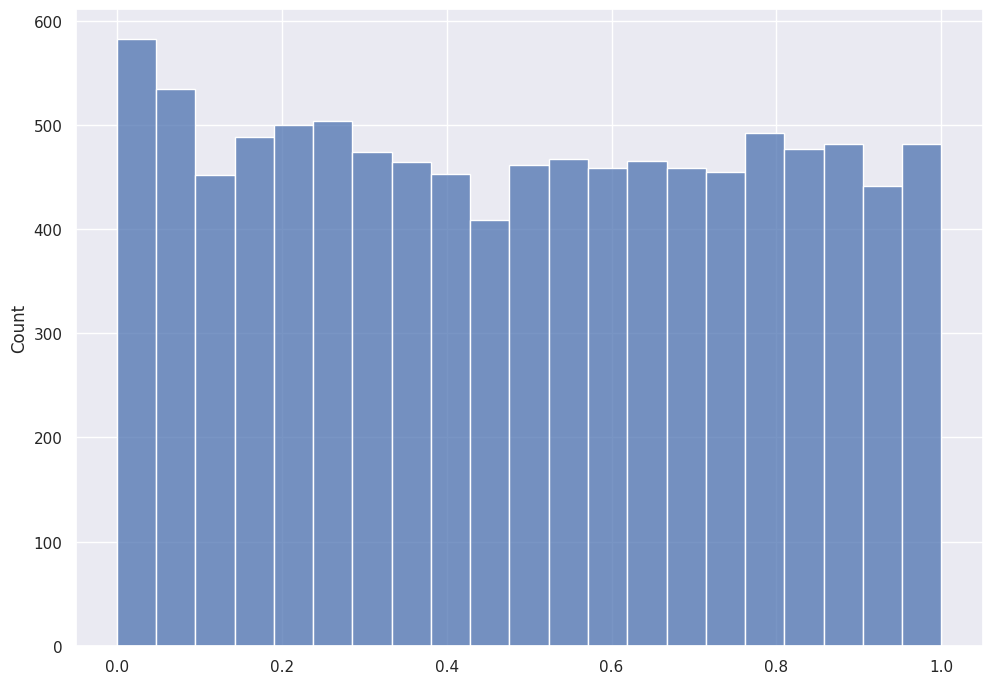

In [127]:
sns.histplot(p_values)

Здесь распределение pvalue очень похоже на равномерное

In [128]:
stats.kstest(p_values, stats.uniform.cdf)

KstestResult(statistic=0.02338579460242507, pvalue=3.4955307267838106e-05, statistic_location=0.30811420539757495, statistic_sign=1)

Теста Колмогорова-Смирнова говорит, что мы не правы, но всеравно посмотрит на статитику

In [169]:
stats.bartlett(data1, data2)

BartlettResult(statistic=0.004552565166369295, pvalue=0.9462053951949693)

Гипотеза не отвергается

Попробуем засунуть данные распределенные нормально

In [144]:
data3 = df[df['Opening ECO'] == 'C61']["Black Rating"]
data4 = df[df['Opening ECO'] == 'C62']["Black Rating"]
p_values = []
for i in range(10000):
    indx1 = np.random.choice(data4.shape[0], data1.shape[0])
    indx2 = np.random.choice(data4.shape[0], data4.shape[0])
    p_values.append(stats.levene(data4.iloc[indx1], data4.iloc[indx2]).pvalue)

<Axes: ylabel='Count'>

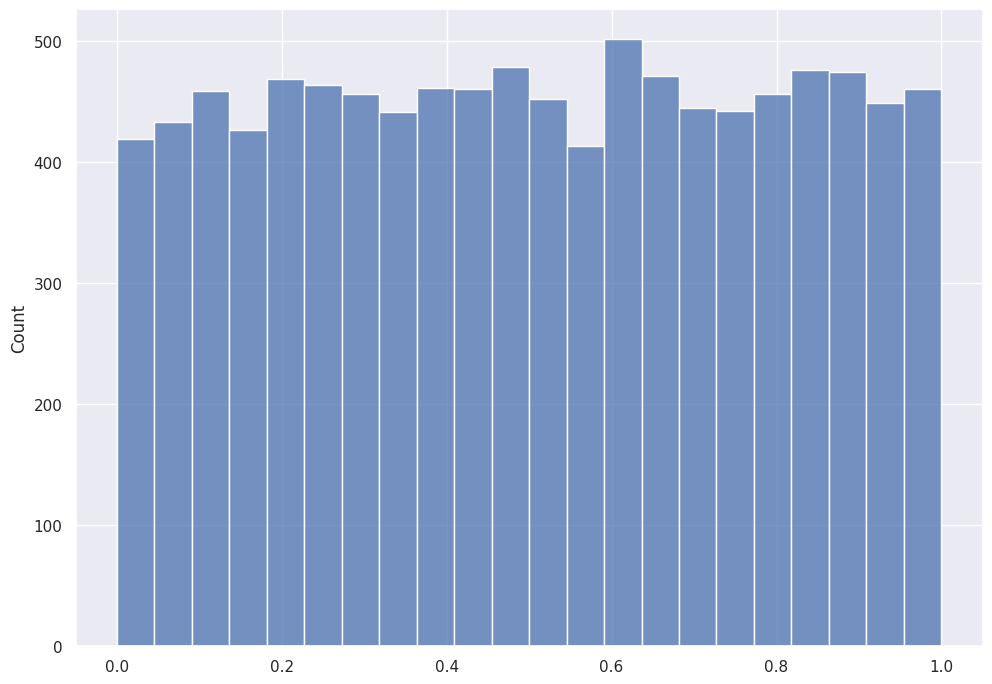

In [145]:
sns.histplot(p_values)

Распределение уже гораздо больше похожее на равномерное, это связано с чуствительностью теста к нормальности

In [134]:
stats.bartlett(data3, data4)

BartlettResult(statistic=9.304241666729874, pvalue=0.0022862391908222038)

Гипотезу отвергаем при уровне значимости 0.05

## Тест Флигнера

In [86]:
print('Для выборок со стандартными отклонениями (1, 2, 4)\n\t', stats.fligner(norm0_1, norm2_2, norm0_4))
print()

print('Для выборок со стандартными отклонениями (5, 5, 5) и разными средними\n\t',
      stats.fligner(stats.norm.rvs(loc=50, scale=5, size=50),
                   stats.norm.rvs(loc=0, scale=5, size=50),
                   stats.norm.rvs(loc=200, scale=5, size=50)))

Для выборок со стандартными отклонениями (1, 2, 4)
	 FlignerResult(statistic=24.985073442640996, pvalue=3.754570270202379e-06)

Для выборок со стандартными отклонениями (5, 5, 5) и разными средними
	 FlignerResult(statistic=0.8061895521712754, pvalue=0.6682487623202662)


In [146]:

p_values = []
for i in range(10000):
    indx1 = np.random.choice(data1.shape[0], data1.shape[0])
    indx2 = np.random.choice(data1.shape[0], data1.shape[0])
    p_values.append(stats.fligner(data1.iloc[indx1], data1.iloc[indx2]).pvalue)

<Axes: ylabel='Count'>

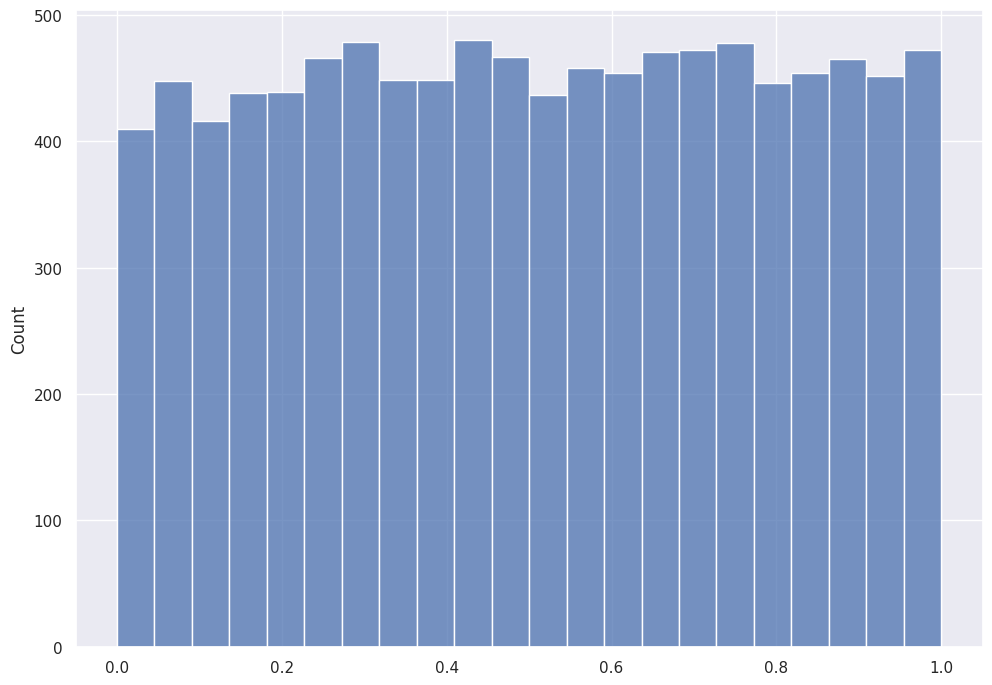

In [147]:
sns.histplot(p_values)

Имеем распредление похожее на равномерное, даже с учетом не нормальности данных, что говорит о его не чувствительности к нормальности


In [148]:
stats.fligner(data1, data2)

FlignerResult(statistic=0.2011686538335718, pvalue=0.6537791913770685)

Гипотеза не отвергается

В очередной раз посмотрим на распределение рейтинга черных по нашим дебютам

In [149]:
data3 = df[df['Opening ECO'] == 'C61']["Black Rating"]
data4 = df[df['Opening ECO'] == 'C62']["Black Rating"]
p_values = []
for i in range(10000):
    indx1 = np.random.choice(data4.shape[0], data1.shape[0])
    indx2 = np.random.choice(data4.shape[0], data4.shape[0])
    p_values.append(stats.levene(data4.iloc[indx1], data4.iloc[indx2]).pvalue)

<Axes: ylabel='Count'>

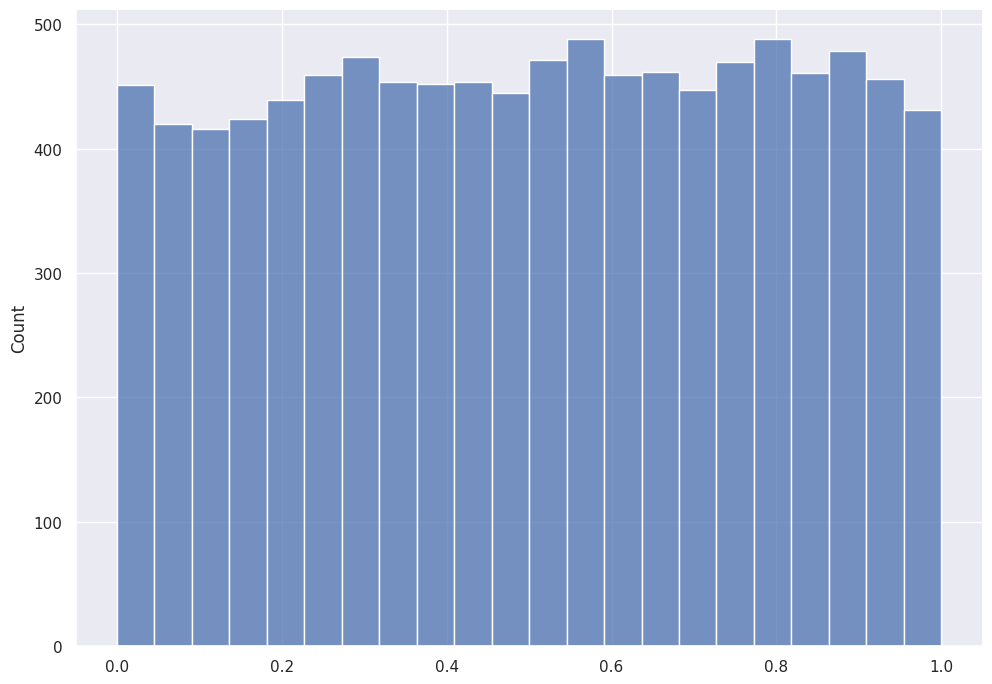

In [150]:
sns.histplot(p_values)

In [151]:
stats.fligner(data3, data4)

FlignerResult(statistic=6.147482401517038, pvalue=0.013159930783665452)

Гипотеза о равенстве дисперсий отвергается при уровне значимости 0.05

R требует чтобы длины выборок совпадали, поэтому проверим равенство дисперсий у рейтингов белых и черных

In [156]:
%%R -i data3 -i data4
fligner.test(wr, br)


	Fligner-Killeen test of homogeneity of variances

data:  wr and br
Fligner-Killeen:med chi-squared = 438.4, df = 382, p-value = 0.02432



Гипотезу отвергаем


# Задание 8

Давайте посмотрим на корреляцию рейтингов белых и черных

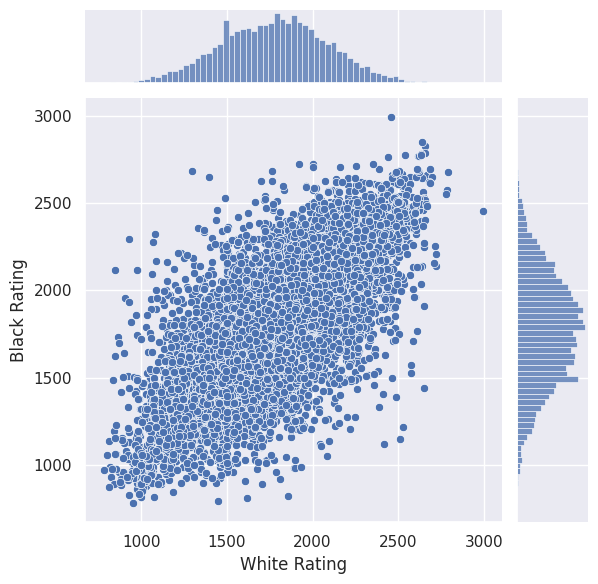

In [87]:
sns.jointplot(data=df, x='White Rating', y='Black Rating')

Видно, что есть достаточно выраженная зависимость проверим

## Корреляция Пирсона

In [88]:
%%R
cor.test(df$White.Rating, df$Black.Rating)


	Pearson's product-moment correlation

data:  df$White.Rating and df$Black.Rating
t = 179.85, df = 18635, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7912368 0.8017336
sample estimates:
      cor 
0.7965452 



In [89]:
stats.pearsonr(df['White Rating'], df['Black Rating'])

PearsonRResult(statistic=0.7965452315672922, pvalue=0.0)

Как и ожидалось получаем достаточно высокое значение

Теперь посмотрим на корреляцию количество зевков и потери белых в сенти пешках

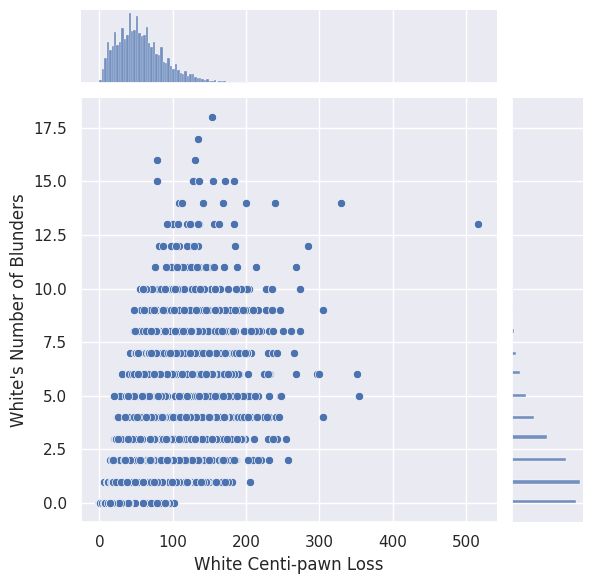

In [164]:
sns.jointplot(data=df, x="White Centi-pawn Loss", y="White's Number of Blunders")

In [165]:
stats.pearsonr(df["White Centi-pawn Loss"], df["White's Number of Blunders"])

PearsonRResult(statistic=0.6790163405749264, pvalue=0.0)

Как и ожидалось достаточно высокое значение, поскольку зевки = ошибки приводят к потерям фигур, а соответсвенно и потерям в сентипешках

## Корреляция Спирмена

In [90]:
stats.spearmanr(df['White Rating'], df['Black Rating'])

SignificanceResult(statistic=0.8009129447791613, pvalue=0.0)

In [91]:
%%R
cor.test(df$White.Rating, df$Black.Rating, method='spearman')


	Spearman's rank correlation rho

data:  df$White.Rating and df$Black.Rating
S = 2.1479e+11, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8009129 



Здесь получаем значение чуть выше, известно, что корреляция Спирмена является лучше чем Пирсона при не нормальности данных, но у нас распределение близко к нормальному, поэтому лучше ориентироваться на Пирсона

In [167]:
stats.spearmanr(df["White Centi-pawn Loss"], df["White's Number of Blunders"])

SignificanceResult(statistic=0.7481566966724056, pvalue=0.0)

Здесь обратная ситуация, данные распределены не нормально, поэтому лучше ориентироваться на Спирмена

## Корреляция Кендалла

In [92]:
stats.kendalltau(df['White Rating'], df['Black Rating'])

SignificanceResult(statistic=0.634053336979216, pvalue=0.0)

In [93]:
%%R
cor.test(df$White.Rating, df$Black.Rating, method='kendall')


	Kendall's rank correlation tau

data:  df$White.Rating and df$Black.Rating
z = 129.7, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.6340533 



Для количества зевков и потерь в сентипешках

In [168]:
stats.kendalltau(df["White Centi-pawn Loss"], df["White's Number of Blunders"])

SignificanceResult(statistic=0.592489098953803, pvalue=0.0)

Видим, что корерляция Кендала сильно ниже чем у Пирсона и Спирмена, это связано с тем, что корреляция Кендалла обычно считается для выборок малых размеров, в нашей же выборке больше 18000 элементов, поэтому получается такая высокая степень неточности.

# Задание 9

## Хи-квадрат

Сначала посмотрим на Хи-квадрат для абсолютно непрервного случая, попробуем приблизить данные распределением Лапласа, параметры для распределения получим методом максимального правдоподобия $\hat{\alpha} = \mu$, $\hat{\beta} = \frac{1}{n}||X_i - \mu||_{1}$

<Axes: ylabel='Density'>

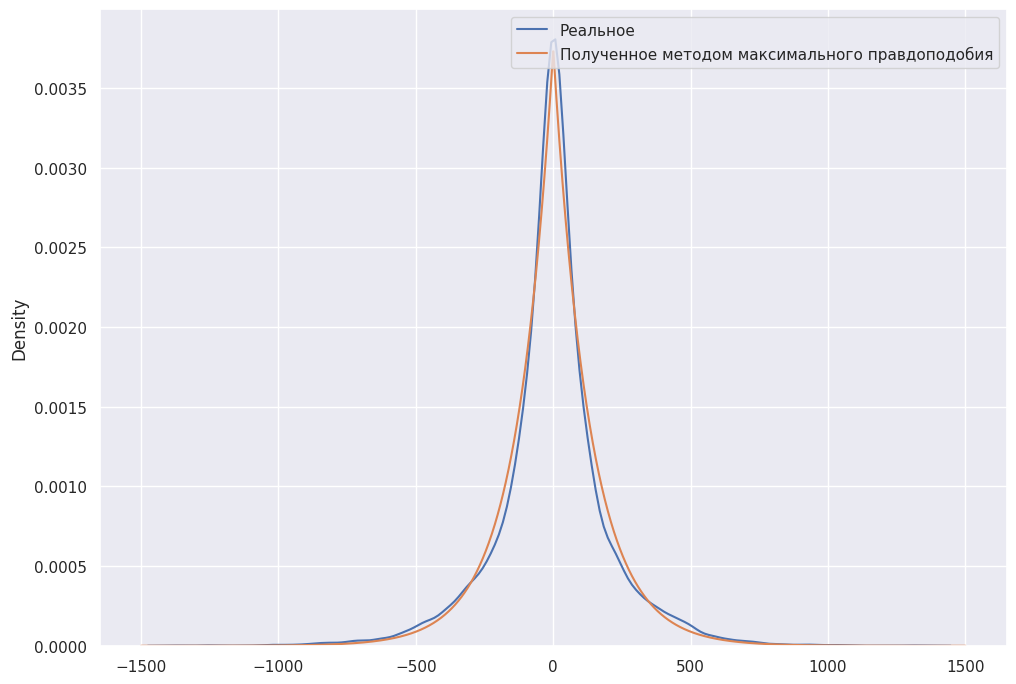

In [94]:
from scipy.stats import chisquare
fig, ax = plt.subplots()
sns.kdeplot(df['White Rating'] - df['Black Rating'], ax = ax, label='Реальное')
x = np.linspace(-1500, 1500, 3000)
X = df['White Rating'] - df['Black Rating']
y = stats.laplace(loc=0, scale=(abs(X-X.median())).mean()).pdf(x)
sns.lineplot(x=x, y=y, ax=ax, label='Полученное методом максимального правдоподобия')


Как известно распределение лапласа является абсолютно непрерывным, поэтому если мы хотим применить тест Хи-квадрат, то нам сначала нужно разбить наш носитель на блоки, т.е. наш носитель меняется от -1500 до 1500, разобьем на 10 блоков.

In [95]:
n = 100
obs = np.zeros(n)
for i in range(X.shape[0]):
    obs[int(X.iloc[i] + 1500) // (3000 // n)] += 1

dstr = stats.laplace(loc=X.median(), scale=(abs(X-X.median())).mean())
exp = np.zeros(n)
for i in range(n):
    exp[i] = dstr.cdf(-1500 + (i + 1) * (3000 // n)) - dstr.cdf(-1500 + i * (3000 // n))
exp *= X.shape[0]
print(np.sum(obs), np.sum(exp))
exp[n // 2] += np.sum(obs) - np.sum(exp)
chisquare(obs, exp)


18637.0 18636.75360583467


Power_divergenceResult(statistic=783.7130641696605, pvalue=5.0680359500898745e-107)

p-value < 0.05 значит гипотеза о равенстве распределений отвергается

### Попробуем приблизить распределение кол-ва ошибок белых пуассоновским распределением, как известно оценкой макисмального правдоподобия для параметра $\lambda$, является $\hat{\lambda} = \frac{1}{n} \sum{X_i}$

<Axes: title={'center': 'Плотность количества ошибок белых при рейтинге матча 1500-2000'}, xlabel="White's Number of Inaccuracies", ylabel='Density'>

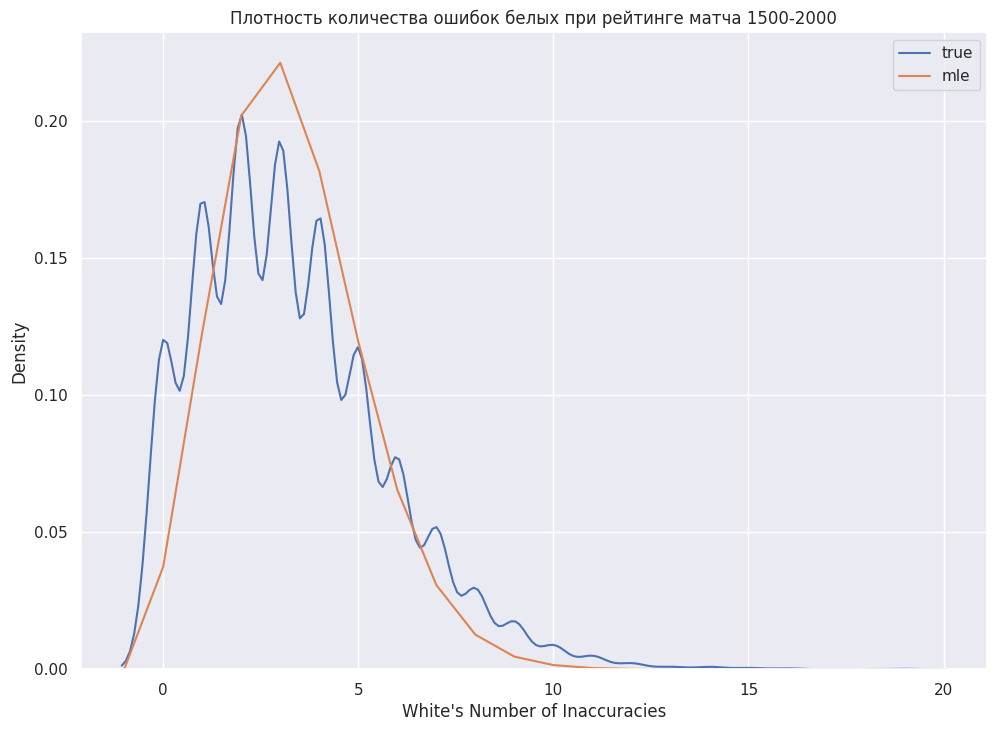

In [96]:
#sns.histplot(df['RatingRange' == '1500-2000']['White Centi-Pawn Loss'])
X = df[df['Rating range'].isin(['1000-1500', '1500-2000'])]["White's Number of Inaccuracies"]
fig, ax = plt.subplots()
sns.kdeplot(X, ax = ax, label="true").set(title="Плотность количества ошибок белых при рейтинге матча 1500-2000")
x = np.arange(-1, 19)
y = stats.poisson(X.mean()).pmf(x)
sns.lineplot(x=x, y=y, ax=ax, label="mle")

In [97]:
obs = X.value_counts() 
obs = obs.sort_index()
pois = stats.poisson(X.mean())
exp = np.array([round(pois.pmf(index) * X.shape[0]) for index in obs.index])
#chisquare(obs, exp)
#print(f'obs sum = {obs.sum()}, exp sum = {exp.sum()}')
exp[13] += 1
exp[14] += 1

chisquare(obs, exp)

Power_divergenceResult(statistic=inf, pvalue=0.0)

In [98]:
%%R -i obs -i exp
chisq.test(obs, exp)


	Pearson's Chi-squared test

data:  obs and exp
X-squared = 266, df = 238, p-value = 0.1027



Результат на Python и R сильно отличаются: на Python гипотеза отвергается при любом уровне значимости, на R гипотеза не отвергается при уровне значимости 0.05

## Точный тест Фишера

Точный тест фишера работает для таблиц 2x2  для сравнения распределений.

Давайте проведем тест для проверки того, что распределение потерь белых, выраженный в сентипешках, меньше при дебюте C20, чем при остальных, \
для этого будем хранить таблицу 2 x 2, где по строкам дебют C20, не C20, а по столбцам потери меньше чем средние чем 100 или большие чем 100

In [99]:
matrix = np.zeros((2, 2))
for i in range(df.shape[0]):
    if df.iloc[i]['Opening ECO'] == 'C20' and df.iloc[i]["White Centi-pawn Loss"] < 100:
        matrix[0][0] += 1
    elif df.iloc[i]['Opening ECO'] == 'C20' and df.iloc[i]["White Centi-pawn Loss"] >= 100:
        matrix[0][1] += 1
    elif df.iloc[i]["White Centi-pawn Loss"] < 100:
        matrix[1][0] += 1
    else:
        matrix[1][1] += 1
    
    

matrix

array([[  227.,    81.],
       [16144.,  2185.]])

In [100]:
stats.fisher_exact(matrix, alternative='less')

SignificanceResult(statistic=0.37929850481469246, pvalue=7.469808492374733e-12)

In [101]:
%%R -i matrix
fisher.test(matrix)


	Fisher's Exact Test for Count Data

data:  matrix
p-value = 1.196e-11
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.2918662 0.4971010
sample estimates:
odds ratio 
  0.379326 



При уровне значимости 0.05 нулевая гипотеза отвергается

## Тест МакНемара

Тест МакНемара используется для проверки на гомогенность выборки, давайте опять сравним распределение потерь пешек, только теперь для дебютов C20 и A40

In [102]:
from statsmodels.stats.contingency_tables import mcnemar
matrix = np.zeros((2, 2))
for i in range(df.shape[0]):
    if df.iloc[i]['Opening ECO'] == 'C20' and df.iloc[i]["White Centi-pawn Loss"] < 100:
        matrix[0][0] += 1
    elif df.iloc[i]['Opening ECO'] == 'C20' and df.iloc[i]["White Centi-pawn Loss"] >= 100:
        matrix[0][1] += 1
    elif df.iloc[i]['Opening ECO'] == 'A40' and df.iloc[i]["White Centi-pawn Loss"] < 100:
        matrix[1][0] += 1
    elif  df.iloc[i]['Opening ECO'] == 'A40':
        matrix[1][1] += 1
        
print(matrix)
print(mcnemar(matrix))

[[227.  81.]
 [442.  74.]]
pvalue      3.506913040998188e-61
statistic   81.0


In [103]:
%%R -i matrix
mcnemar.test(matrix)


	McNemar's Chi-squared test with continuity correction

data:  matrix
McNemar's chi-squared = 247.8, df = 1, p-value < 2.2e-16



При уровне значимости 0.05 нулевая гипотеза отвергается

## Тест Кохрана-Мантеля-Хензеля

Это обобщение теста МакНемара для случая нескольких групп, давайте посмотрим на дебюты A40, B01, D02

In [104]:
from statsmodels.stats.contingency_tables import cochrans_q
matrix = np.zeros((3, 2))
for i in range(df.shape[0]):
    if df.iloc[i]['Opening ECO'] == 'B01' and df.iloc[i]["White Centi-pawn Loss"] < 100:
        matrix[0][0] += 1
    elif df.iloc[i]['Opening ECO'] == 'B01' and df.iloc[i]["White Centi-pawn Loss"] >= 100:
        matrix[0][1] += 1
    elif df.iloc[i]['Opening ECO'] == 'A40' and df.iloc[i]["White Centi-pawn Loss"] < 100:
        matrix[1][0] += 1
    elif  df.iloc[i]['Opening ECO'] == 'A40':
        matrix[1][1] += 1
    elif df.iloc[i]['Opening ECO'] == 'D02' and df.iloc[i]["White Centi-pawn Loss"] < 100:
        matrix[2][0] += 1
    elif  df.iloc[i]['Opening ECO'] == 'D02':
        matrix[2][1] += 1

print(matrix)
print(cochrans_q(matrix))

[[550.  86.]
 [442.  74.]
 [325.  31.]]
df          1
pvalue      0.31731050786291115
statistic   1.0


При уровне значимости 0.05 гипотезы не отвергается

# Задание 10

## Корреляционная матрица

<Axes: >

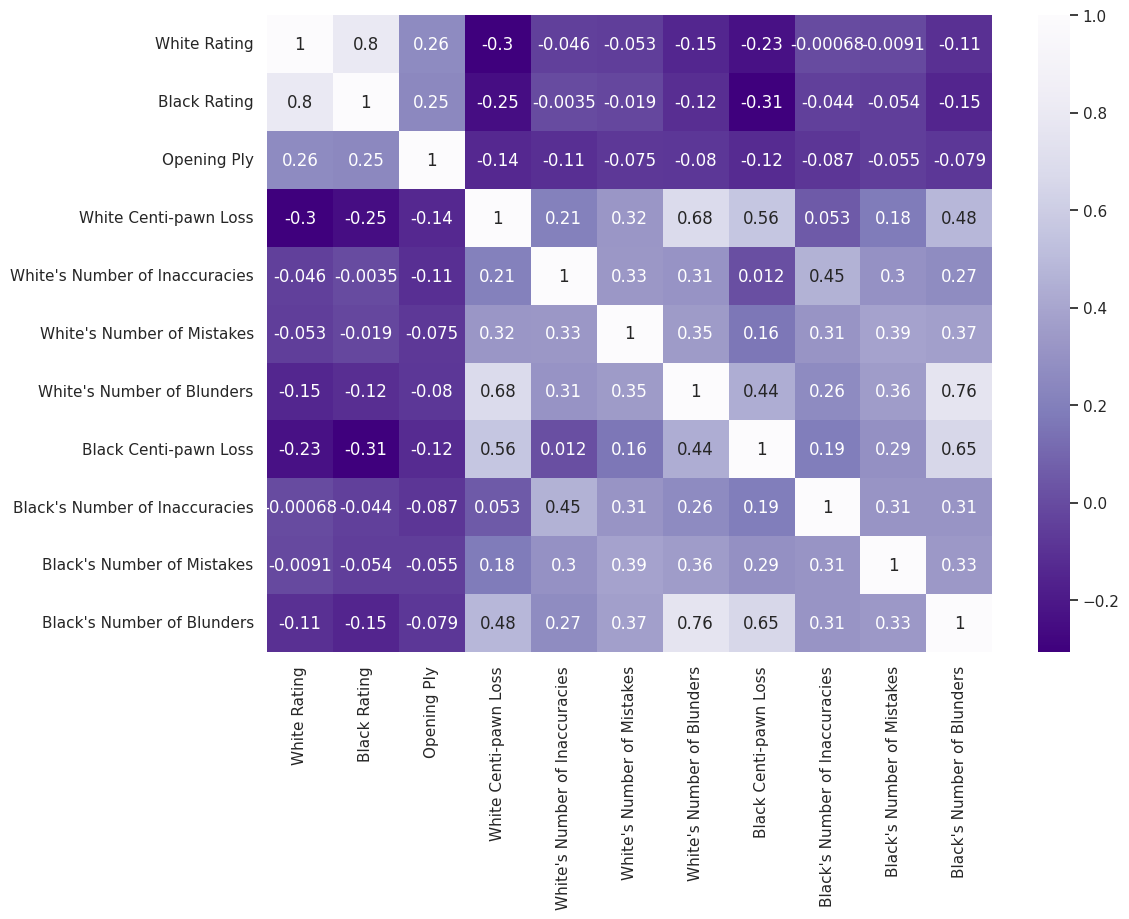

In [105]:
df_numeric = df[numeric]
sns.heatmap(df_numeric.corr(), cmap="Purples_r", annot=True)  

corrplot 0.92 loaded


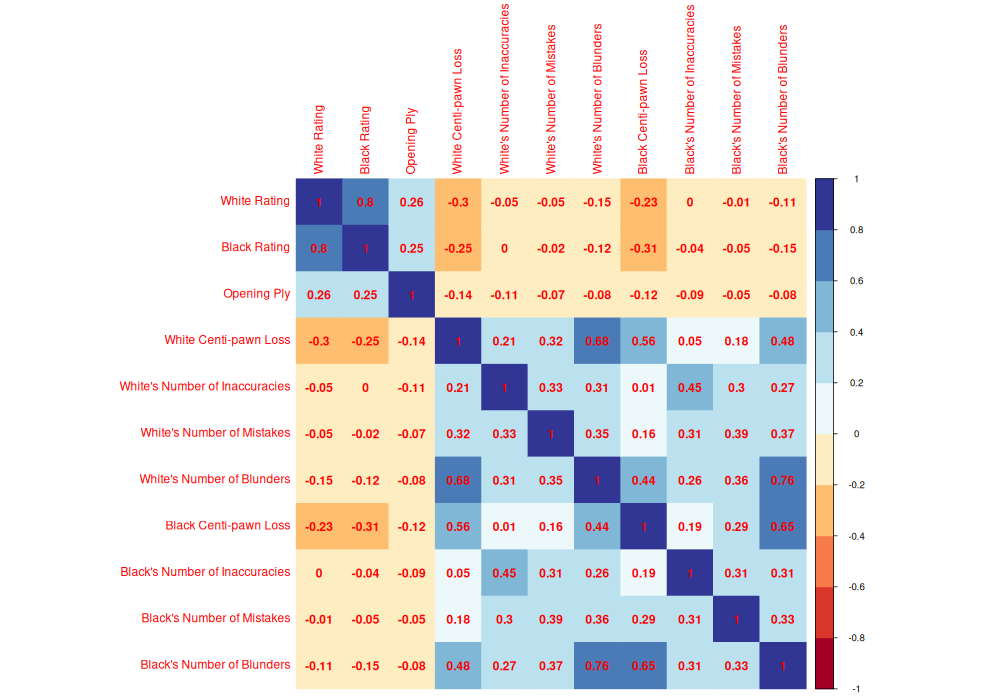

In [106]:
%%R -i df_numeric -w 1000 -h 700
#install.packages("corrplot")
library(corrplot)

corr_mat = cor(df_numeric)

corrplot(cor(df_numeric), method="color", addCoef.col = "red", col = COL2('RdYlBu', 10))


Видим, что есть хорошая корреляция у рейтингов Белых и Черных, а также количество ошибок, неточностей и зевков между собой хорошо коррелируют, что является достаточно предсказуемым

## Инфляция дисперсии

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant 

df_numeric.head()

X = add_constant(df_numeric)

pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

const                             55.626884
White Rating                       2.959596
Black Rating                       2.944624
Opening Ply                        1.098019
White Centi-pawn Loss              3.348960
White's Number of Inaccuracies     1.554938
White's Number of Mistakes         1.531030
White's Number of Blunders         4.614182
Black Centi-pawn Loss              3.227064
Black's Number of Inaccuracies     1.517359
Black's Number of Mistakes         1.478457
Black's Number of Blunders         4.537721
dtype: float64

Все значения меньше пяти, это говорит о том, что мультиколинеарности в данных нет

# Задание 11

## Однофакторный дисперсионный анализ

Проверим на равенство параметра потерь белых в сенти пешках в дебютах A40, D02

Как известно дисперсионный анализ работает только на нормально распределенных выходах

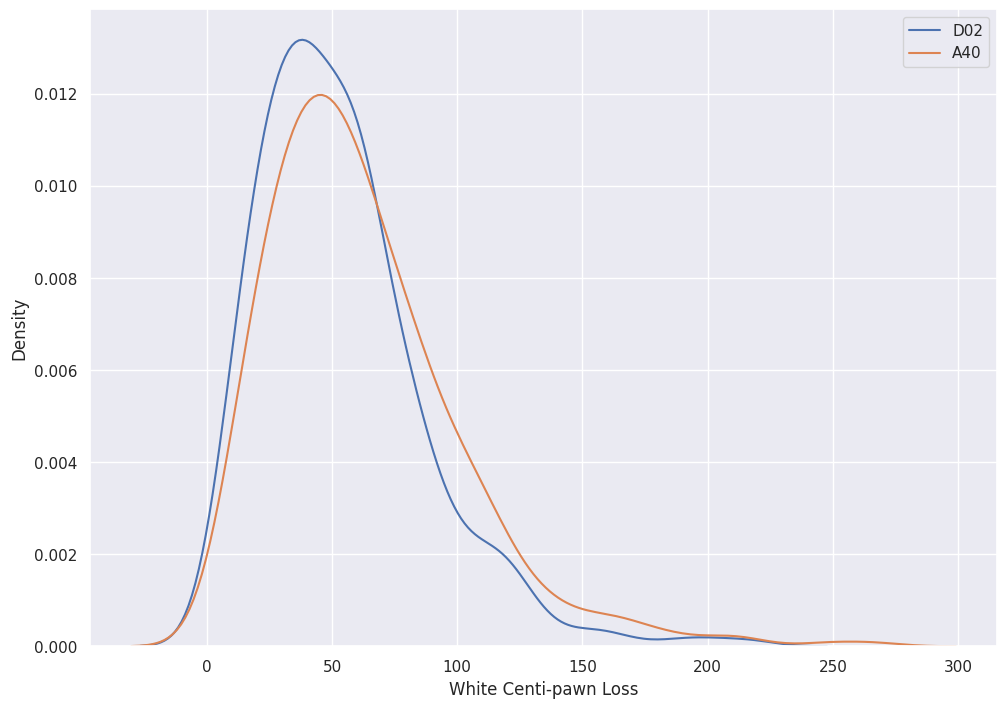

In [108]:
from scipy.stats import f_oneway


loss_d02 = df[df['Opening ECO'] == 'D02']["White Centi-pawn Loss"]
loss_a40 = df[df['Opening ECO'] == 'A40']["White Centi-pawn Loss"]

sns.kdeplot(loss_d02, label="D02")
sns.kdeplot(loss_a40, label="A40")
plt.legend()

Наши данные не похожи на нормальные, для нормализации воспользуемся преобразованием Бокса-Кокса, оно является монотонным, поэтому сохранит различия в средних значениях

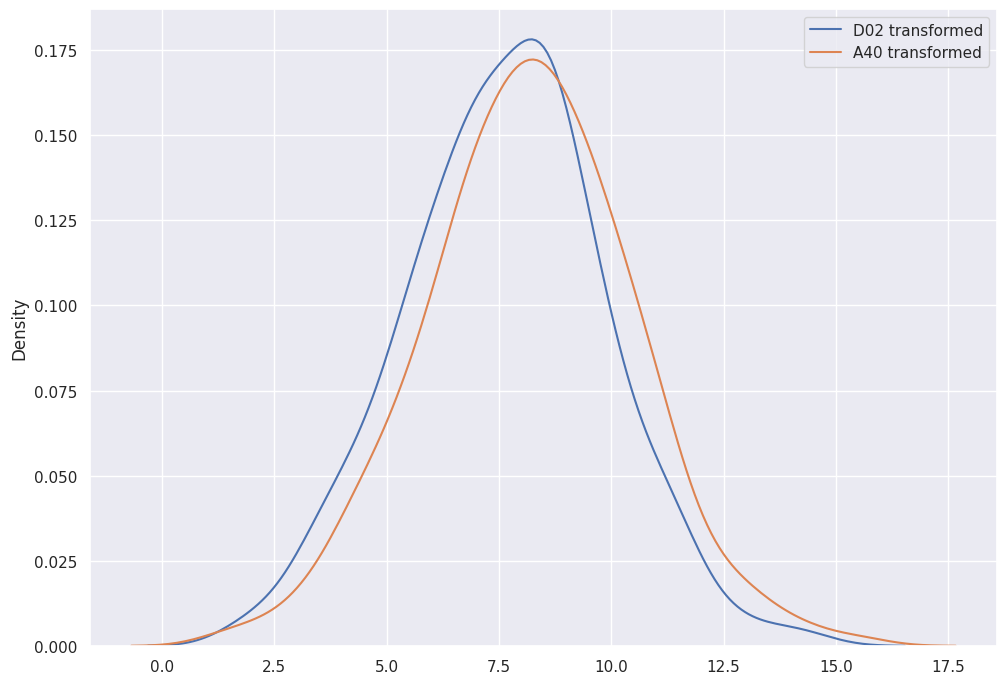

In [109]:
from scipy.stats import boxcox
transformed_d02, best_lambda = boxcox(loss_d02) 
transformed_a40 = boxcox(loss_a40, best_lambda)
sns.kdeplot(transformed_d02, label="D02 transformed")
sns.kdeplot(transformed_a40, label="A40 transformed")
plt.legend()

In [110]:
print(f'D02: {stats.shapiro(transformed_d02)}')
print(f'A40: {stats.shapiro(transformed_a40)}')

D02: ShapiroResult(statistic=0.9967226982116699, pvalue=0.6879077553749084)
A40: ShapiroResult(statistic=0.9979925751686096, pvalue=0.8097094297409058)


Вот тут уже распределение похоже на нормальное, и тест Шапиро-Уилка дает хорошие p-value

In [111]:
f_oneway(transformed_a40, transformed_d02)

F_onewayResult(statistic=11.707368778079763, pvalue=0.000651544626001229)

p-value < 0.05, значит гипотезу о равенство в средних по этим группам отвергаем

Проверим гипотезу, что средние потери белых в сентипешках равны по группам диапазонов рейтинга "$i * 500 - (i+1)*500$" $i \in \overline{0,5}$

In [112]:
%%R -i best_lambda
df$White.Centi.pawn.Loss <- (df$White.Centi.pawn.Loss ^ best_lambda - 1) / best_lambda
summary(aov(White.Centi.pawn.Loss ~ Rating.range, data=df))

                Df Sum Sq Mean Sq F value Pr(>F)    
Rating.range     4   6276  1569.0   301.7 <2e-16 ***
Residuals    18632  96882     5.2                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


$ p-value < 0.05 $, значит гипотезу о равенстве средних отвергаем

##  Двухфакторный дисперсионный анализ

Сначала давайте найдем два дебюта, у которых гипотеза о равенстве средних потерь белых не отвергается

In [113]:
loss_d02 = boxcox(df[df['Opening ECO'] == 'D02']["White Centi-pawn Loss"], best_lambda)
loss_c15 = boxcox(df[df['Opening ECO'] == 'C15']["White Centi-pawn Loss"], best_lambda)

f_oneway(loss_d02, loss_c15)

F_onewayResult(statistic=0.38754125206084855, pvalue=0.5339720111984354)

Здесь p-value > 0.05, значит гипотезу не отвергаем, теперь давайте попробуем посмотреть еще на второй признак - количество теоретических ходов

ShapiroResult(statistic=0.9963712096214294, pvalue=0.5487396121025085)

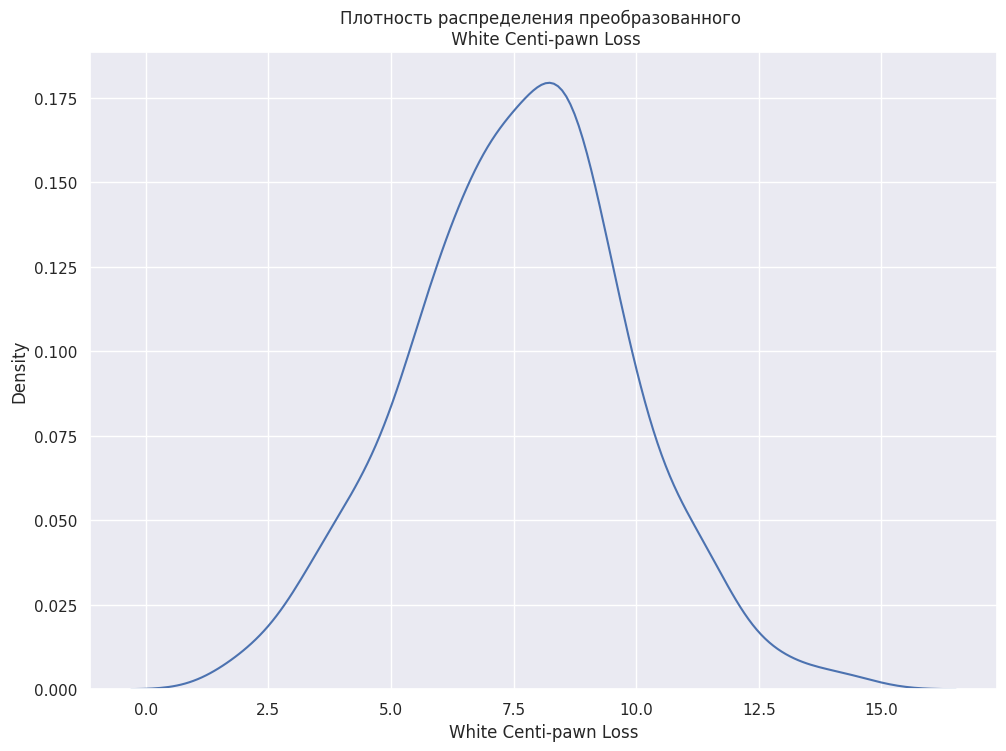

In [114]:
data = df[df['Opening ECO'].isin(['D02', 'C15'])]
data['White Centi-pawn Loss'] = boxcox(data['White Centi-pawn Loss'], best_lambda)
sns.kdeplot(data["White Centi-pawn Loss"]).set(title="Плотность распределения преобразованного \n White Centi-pawn Loss")
stats.shapiro(data['White Centi-pawn Loss'])

Переменная распределена нормально, можем приступать к анализу

In [115]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm



formula = 'Q("White Centi-pawn Loss") ~ C(Q("Opening ECO")) + C(Q("Opening Ply")) + C(Q("Opening ECO")):C(Q("Opening Ply")) '
lm = ols(formula, data).fit()
print(lm.summary())
print()
print(anova_lm(lm))

                                OLS Regression Results                                
Dep. Variable:     Q("White Centi-pawn Loss")   R-squared:                       0.035
Model:                                    OLS   Adj. R-squared:                  0.016
Method:                         Least Squares   F-statistic:                     1.897
Date:                        Sun, 26 Nov 2023   Prob (F-statistic):             0.0689
Time:                                19:21:55   Log-Likelihood:                -832.72
No. Observations:                         378   AIC:                             1681.
Df Residuals:                             370   BIC:                             1713.
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------

При уровне значимости 0.05, получаем что значим является только фактор количества теоретических ходов

In [116]:
%%R -i data
names(data)[6] <- "Loss"
names(data)[4] <- "ECO"
names(data)[5] <- "Ply"
summary(aov(Loss  ~ Ply + ECO + Ply:ECO, data=data))


             Df Sum Sq Mean Sq F value Pr(>F)
Ply           1    4.4   4.418   0.884  0.348
ECO           1    0.0   0.041   0.008  0.928
Ply:ECO       1    4.0   4.039   0.808  0.369
Residuals   374 1869.9   5.000               


Опять получаем различия в Python и R

# Задание 12

In [182]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelBinarizer

In [204]:
X = df.drop(columns=['Game ID', 'White Rating', 'Black Rating', 'White Centi-pawn Loss'])
y = df['White Centi-pawn Loss']
X

,Opening ECO,Opening Ply,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders,Rating range
0,C20,4,2,2,0,87,2,4,1,1500-2000
1,C46,6,0,0,1,6,0,0,0,1000-1500
2,C68,7,1,0,0,42,1,0,2,1500-2000
3,D31,5,3,0,0,53,6,0,1,1500-2000
4,A01,2,3,2,0,50,6,3,0,1500-2000
...,...,...,...,...,...,...,...,...,...,...
18632,B00,2,5,1,2,94,4,4,3,1000-1500
18633,B20,3,5,0,1,12,2,0,0,1000-1500
18634,B21,3,9,4,4,36,7,2,2,1000-1500
18635,C15,7,1,0,0,34,6,1,1,1500-2000


Будем прогнозировать White Centi-pawn Loss, для этого нужно закодировать категориальные признаки, мы сделаем это через OneHotEncoder, а также приведем признаки к виду с нулевым средним и единичной дисперсии для большей устойчивости, также будем генерировать новые полиномиальные признаки, чтобы учесть возможную нелинейность зависимости 

#### Линейная регрессия с $l_2$ регуляризацией

In [205]:
from sklearn.model_selection import train_test_split

X = OneHotEncoder(handle_unknown='ignore').fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [120]:

model = Pipeline([
  #  ("onehot", ohe),
   # ("poly", PolynomialFeatures()),
    ("scaler", StandardScaler(with_mean=False)),
    ("regr", Ridge())
])
#ohe = OneHotEncoder()
#X = ohe.fit_transform(X)

ridge_cv = GridSearchCV(
    model,
    cv=5,
    scoring='r2',
    param_grid={'regr__alpha': np.logspace(-10, 10, 2)}
)

ridge_cv.fit(X_train, y_train)
ridge_cv.best_params_

{'regr__alpha': 1e-10}

In [121]:
y_pred=ridge_cv.predict(X_test)
r2_score(y_test, y_pred)

0.6662392624600659

#### С полиномиальными признаками

Опытным путем было выяснено, что при коэфициентах регуляризации ниже 1000 модель слишком сильно переучивается и поэтому выдает неадекватный результат на тесте

In [122]:
model = Pipeline([
    ("poly", PolynomialFeatures()),
    ("scaler", StandardScaler(with_mean=False)),
    ("regr", Ridge(alpha=100000))
])
ridge_cv = GridSearchCV(
    model,
    cv=3,
    scoring='r2',
    param_grid={'regr__alpha': np.arange(10000, 100000, 500)}
)
ridge_cv.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('regr', Ridge(alpha=100000))]),
             param_grid={'regr__alpha': array([10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000,
       14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500,
       19000, 19500, 20000, 20500, 21000, 21500, 22000, 22500, 23000,
       23500, 2...
       68500, 69000, 69500, 70000, 70500, 71000, 71500, 72000, 72500,
       73000, 73500, 74000, 74500, 75000, 75500, 76000, 76500, 77000,
       77500, 78000, 78500, 79000, 79500, 80000, 80500, 81000, 81500,
       82000, 82500, 83000, 83500, 84000, 84500, 85000, 85500, 86000,
       86500, 87000, 87500, 88000, 88500, 89000, 89500, 90000, 90500,
       91000, 91500, 92000, 92500, 93000, 93500, 94000, 94500, 95000,
       95500, 96000, 96500, 97000, 97500, 98000, 98500, 99000, 99500])},
             scoring='r2')

In [123]:
print(f'best params {ridge_cv.best_params_}')
r2_score(y_test, ridge_cv.predict(X_test))

best params {'regr__alpha': 10500}


0.6097726421351832

Тут мы обнаружили, что оптимальное значение для константы регуляризации находится от 10000 до 11000, давайте уточним оценку

In [ ]:
model = Pipeline([
    ("poly", PolynomialFeatures()),
    ("scaler", StandardScaler(with_mean=False)),
    ("regr", Ridge())
])
ridge_cv = GridSearchCV(
    model,
    cv=3,
    scoring='r2',
    param_grid={'regr__alpha': np.arange(10000, 11000, 50)}
)
ridge_cv.fit(X_train.astype(np.float16), y_train.astype(np.float16))

In [125]:
print(f'best params {ridge_cv.best_params_}')
r2_score(y_test, ridge_cv.predict(X_test))

best params {'regr__alpha': 10350}


0.6095618022523445

Тут мы почти не получаем улучшения в качестве, значит дальнейший перебор $\alpha$ бесполезен, понятно что у нас получилось слишком большое по размерности пространство признаков из-за этого у нас происходит переобучение при адекватных уровнях константы регуляризации, давайте воспользуемся алгоритмом PCA для уменьшения размерности

In [34]:
from sklearn.decomposition import TruncatedSVD
model = Pipeline([
    ('pca', TruncatedSVD()),
    ("poly", PolynomialFeatures(interaction_only=True)),
    ("scaler", StandardScaler(with_mean=False)),
    ("regr", Ridge())
])

pca_cv = GridSearchCV(
    model,
    cv=3,
    scoring='r2',
    param_grid={'regr__alpha': np.logspace(-1, 2, 5), 'pca__n_components': [30, 35, 40, 45]}
)
pca_cv.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', TruncatedSVD()),
                                       ('poly',
                                        PolynomialFeatures(interaction_only=True)),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('regr', Ridge())]),
             param_grid={'pca__n_components': [30, 35, 40, 45],
                         'regr__alpha': array([  0.1       ,   0.56234133,   3.16227766,  17.7827941 ,
       100.        ])},
             scoring='r2')

In [35]:
print(f'best params {pca_cv.best_params_}')
r2_score(y_test, pca_cv.predict(X_test))

best params {'pca__n_components': 35, 'regr__alpha': 3.1622776601683795}


0.5300364074154873

Как видно, это ничего не дало: качество не улучшилось

Обучим теперь на R линейную регрессию с лучшими параметрами, т.е. сначала кодируем категориальные признаки через OneHotEncoding, затем применяем PCA и оставляем только 35 признаков, после этого производим Полиномиальные признаки со степенью 2 и для большей устойчивости нормализуем признаки

In [206]:
from sklearn.decomposition import TruncatedSVD
#X = pd.DataFrame(X)
pipe = Pipeline([
    ('pca', TruncatedSVD(35)),
    ("poly", PolynomialFeatures(interaction_only=True)),
    ("scaler", StandardScaler(with_mean=False)),
])
X = pipe.fit_transform(np.array(X.todense()))


In [209]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,621,622,623,624,625,626,627,628,629,630
0,1.0,4.476249,-0.382893,-1.206321,-0.555941,-0.483819,0.939835,-0.117889,0.060795,1.741957,...,-0.043851,0.132879,-0.022775,0.134347,-0.022554,0.003932,-0.025301,-0.010972,0.061510,-0.012078
1,1.0,4.244308,2.161189,1.239652,0.085709,-0.040034,-1.448659,1.394526,0.515911,0.179520,...,0.003265,-0.334439,-0.391511,0.026270,-0.003899,-0.004643,0.000340,0.437931,-0.027927,-0.037453
2,1.0,5.354512,1.261688,-0.645305,-1.165842,-0.398090,0.235042,-0.065137,0.290820,-2.193243,...,-0.755448,0.437918,0.334479,0.114454,-0.645337,-0.501427,-0.187142,0.267626,0.087034,0.076157
3,1.0,5.467600,1.108819,-1.248116,-0.988983,-0.618819,1.047144,0.065403,0.102497,0.479798,...,-3.811862,-1.526396,-2.325978,1.258988,1.345502,2.085771,-1.231365,0.769008,-0.395593,-0.690600
4,1.0,4.149614,-0.432352,-0.015633,-0.753205,-0.322014,-0.431569,-1.696816,-0.867065,0.934319,...,-1.706995,-0.454329,-1.273282,1.114281,0.450863,1.285413,-1.226923,0.315003,-0.261991,-0.841164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,1.0,2.700521,-1.106662,0.792575,1.389940,-0.648370,0.796168,1.671237,-1.500460,-0.528180,...,0.400338,1.017370,-0.061233,0.750948,0.323725,-0.019821,0.265128,-0.046378,0.540554,-0.037272
18633,1.0,4.480016,1.575593,1.312903,0.374127,-0.443386,-1.586211,2.041035,0.548975,0.286974,...,0.324750,-0.053978,0.000939,0.606918,-0.011742,0.000208,0.146493,-0.000032,-0.019535,0.000389
18634,1.0,1.937883,-0.822709,0.040525,1.039260,-1.772633,-0.365189,0.995770,1.314042,-1.315227,...,0.156534,-1.494415,1.318322,0.332774,-0.347103,0.311496,0.085760,-2.738105,-0.656870,0.663850
18635,1.0,5.073256,0.425605,-2.448406,-0.456057,1.238269,0.376235,0.066349,0.136687,0.381715,...,-5.357821,-0.604307,-0.854333,1.492256,0.828183,1.191075,-2.269132,0.123692,-0.205334,-0.332560


In [210]:
%%R -i X -i y
model <- lm(y ~ ., data=X)

In [211]:
%%R 
summary(model)


Call:
lm(formula = y ~ ., data = X)

Residuals:
   Min     1Q Median     3Q    Max 
-93.71 -13.40  -2.44   9.96 338.82 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.248e+02  3.648e+00  34.201  < 2e-16 ***
`0`                 NA         NA      NA       NA    
`1`         -1.661e+01  7.564e-01 -21.961  < 2e-16 ***
`2`         -3.247e+01  4.721e+00  -6.879 6.22e-12 ***
`3`          3.161e+01  5.873e+00   5.383 7.41e-08 ***
`4`         -5.540e+00  3.732e+00  -1.485 0.137660    
`5`          7.964e+00  3.691e+00   2.158 0.030954 *  
`6`         -1.303e+01  4.405e+00  -2.959 0.003095 ** 
`7`          2.099e+01  3.518e+00   5.967 2.47e-09 ***
`8`         -6.673e+00  6.290e+00  -1.061 0.288723    
`9`         -7.544e+01  7.102e+00 -10.623  < 2e-16 ***
`10`        -5.843e+00  4.308e+00  -1.356 0.174976    
`11`         2.673e+01  5.573e+00   4.796 1.63e-06 ***
`12`        -5.148e+01  9.331e+00  -5.517 3.50e-08 **

 .  
`25`         1.392e+01  3.522e+00   3.953 7.75e-05 ***
`26`        -2.158e+01  4.999e+00  -4.316 1.59e-05 ***
`27`         1.284e+00  4.682e+00   0.274 0.783891    
`28`        -2.239e+01  2.617e+00  -8.557  < 2e-16 ***
`29`        -3.289e+00  4.077e+00  -0.807 0.419888    
`30`         1.119e+00  2.961e+00   0.378 0.705367    
`31`        -1.654e+01  3.570e+00  -4.633 3.63e-06 ***
`32`        -6.674e-01  2.277e+00  -0.293 0.769489    
`33`        -2.762e+00  2.164e+00  -1.276 0.201939    
`34`         2.065e+00  2.271e+00   0.909 0.363137    
`35`        -6.161e+00  1.802e+00  -3.418 0.000632 ***
`36`        -4.782e+00  3.817e+00  -1.253 0.210219    
`37`        -4.036e+00  4.301e+00  -0.938 0.348074    
`38`         3.181e-01  3.174e+00   0.100 0.920167    
`39`        -5.999e+00  2.814e+00  -2.132 0.033032 *  
`40`         3.102e+00  3.470e+00   0.894 0.371301    
`41`         6.588e+00  2.633e+00   2.502 0.012342 *  
`42`         1.644e+00  2.925e+00   0.562 0.574081    
`43` 

Теперь используем стандартную линейную регресию, перед этим закодируем все категориальные признаки и нормализуем колонки

In [213]:
X = df.drop(columns=['Game ID', 'White Rating', 'Black Rating', 'White Centi-pawn Loss'])
X = OneHotEncoder(handle_unknown='ignore').fit_transform(X)


pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
])

X = pipe.fit_transform(np.array(X.todense()))
X = pd.DataFrame(X)
X


,0,1,2,3,4,5,6,7,8,9,...,807,808,809,810,811,812,813,814,815,816
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2.027132,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.597669,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2.027132,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2.027132,0.0,0.0,0.0
4,0.0,10.839276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2.027132,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.597669,0.000000,0.0,0.0,0.0
18633,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.597669,0.000000,0.0,0.0,0.0
18634,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.597669,0.000000,0.0,0.0,0.0
18635,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2.027132,0.0,0.0,0.0


In [214]:
%%R -i X -i y
model <- lm(y ~ ., data=X)

In [215]:
%%R 
summary(model)


Call:
lm(formula = y ~ ., data = X)

Residuals:
   Min     1Q Median     3Q    Max 
-90.23 -11.21  -1.77   8.74 151.97 

Coefficients: (11 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 484.375388  53.132742   9.116  < 2e-16 ***
`0`           2.540226   4.315501   0.589 0.556118    
`1`           1.353057   2.182717   0.620 0.535334    
`2`           0.754017   1.241928   0.607 0.543769    
`3`           0.642154   1.241223   0.517 0.604914    
`4`           1.102523   2.400872   0.459 0.646083    
`5`           0.701675   1.530196   0.459 0.646561    
`6`           0.444113   1.460735   0.304 0.761105    
`7`           0.542096   1.031376   0.526 0.599170    
`8`           0.275361   0.660806   0.417 0.676900    
`9`           0.171376   0.765822   0.224 0.822930    
`10`          0.937987   1.713423   0.547 0.584087    
`11`          0.437050   0.785042   0.557 0.577725    
`12`          0.093018   0.328922   0.283 0.777336  

Получили схожие значения с Pyhton, хотя качество конечно отличается, но в обоих языках получили, что стандартная линейная регрессия без полиномиальных признаков дает лучший результат это связано с тем, что для избежания переобучения приходилось убирать признаки через PCA, поскольку без него признаковое пространство ~360000

Давайте еще посмотрим, что если не кодировать категориальные признаки, а использовать только численные

In [220]:
X = df[numeric].drop(columns=['White Centi-pawn Loss'])
X

,White Rating,Black Rating,Opening Ply,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders
0,1441,1559,4,2,2,0,87,2,4,1
1,1258,1567,6,0,0,1,6,0,0,0
2,1697,1712,7,1,0,0,42,1,0,2
3,1978,1868,5,3,0,0,53,6,0,1
4,2073,1816,2,3,2,0,50,6,3,0
...,...,...,...,...,...,...,...,...,...,...
18632,884,1415,2,5,1,2,94,4,4,3
18633,1187,845,3,5,0,1,12,2,0,0
18634,1450,789,3,9,4,4,36,7,2,2
18635,1959,1684,7,1,0,0,34,6,1,1


In [221]:
%%R -i X 
model <- lm(y ~ ., data=X)

In [222]:
%%R
summary(model)


Call:
lm(formula = y ~ ., data = X)

Residuals:
     Min       1Q   Median       3Q      Max 
-182.942  -11.714   -1.859    9.491  153.323 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      34.1722569  1.0645521  32.100  < 2e-16 ***
`White Rating`                   -0.0118076  0.0007965 -14.824  < 2e-16 ***
`Black Rating`                    0.0015656  0.0007926   1.975  0.04825 *  
`Opening Ply`                    -0.1545953  0.0502284  -3.078  0.00209 ** 
`White's Number of Inaccuracies`  2.3247934  0.0741027  31.373  < 2e-16 ***
`White's Number of Mistakes`      5.6663451  0.1237225  45.799  < 2e-16 ***
`White's Number of Blunders`     13.7734893  0.1130334 121.853  < 2e-16 ***
`Black Centi-pawn Loss`           0.5500172  0.0055694  98.757  < 2e-16 ***
`Black's Number of Inaccuracies` -2.8871330  0.0715455 -40.354  < 2e-16 ***
`Black's Number of Mistakes`     -4.4888586  0.1245576 -36.038  < 2e-16 ***
`Black's

Из-за большого числа признаков интерпретация результатов проблематична